### Introduction:

- Goal is to construct and compare / contrast the performance of three separate feed-forward / back propagating neural networks.


- This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. It has 39,797 observations and 61 attributes. 'shares' variable will serve as the response variable. We will select the explanatory variables using feature selection PCA technique. 

Steps:
1. We will load the data and do some EDA work to gain some insights from the dataset. 
2. Depending upon the information we learn from EDA work and also domain knowledge of the data, we will try to find key errors and pitfalls in the data which might create problem in futher model training.  
3. Transform data distributions via feature selection and dimensionality reduction of the 60 candidate explanatory variables to identify variables that you believe will prove to be relatively useful within the required linear regression model.
4. Construct and train at least three different neural network models using the same explanatory variables for each model.
5. Conclusion. 

In [1]:
# load the pandas and numpy libraries
import pandas as pd
import numpy as np 

# importing dataset from github. This data set contains information related to articles published by Mashable. 
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M4_Data.csv"
data = pd.read_csv(filename)
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
data.info() # checking datatype and null values of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [3]:
data # sanity check

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


 ### Exploratory Data Analysis

In [4]:
data.isna().sum() # check for missing values

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [5]:
data.describe() # Check the statistical information for the dataset

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


We will divide these columns/attributes into groups based upon the data and domain available

In [6]:
urltd = data.iloc[:,0:2]
num_of_content = data.iloc[:,2:13]
data_channel = data.iloc[:,13:19]
keywords = data.iloc[:,19:31]
day_of_publish = data.iloc[:,31:39]
LDA_proximity = data.iloc[:,39:44]
sentiment = data.iloc[:,44:60]
shares =  data.iloc[:,60]
shares = pd.DataFrame(shares)

In [7]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [8]:
sentiment # sanity check 

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [9]:
shares # response variable 

,shares
0,593
1,711
2,1500
3,1200
4,505
...,...
39639,1800
39640,1900
39641,1900
39642,1100


- Numeric variables = num_of_content + keywords + sentiment 
- Categorical variables = data_channel + day_of_publish + LDA_proximity 
- Response variable = shares

In [10]:
sentiment

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


First, we will plot and try to analyze and gather information about 'Numeric variables' 

In [11]:
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt

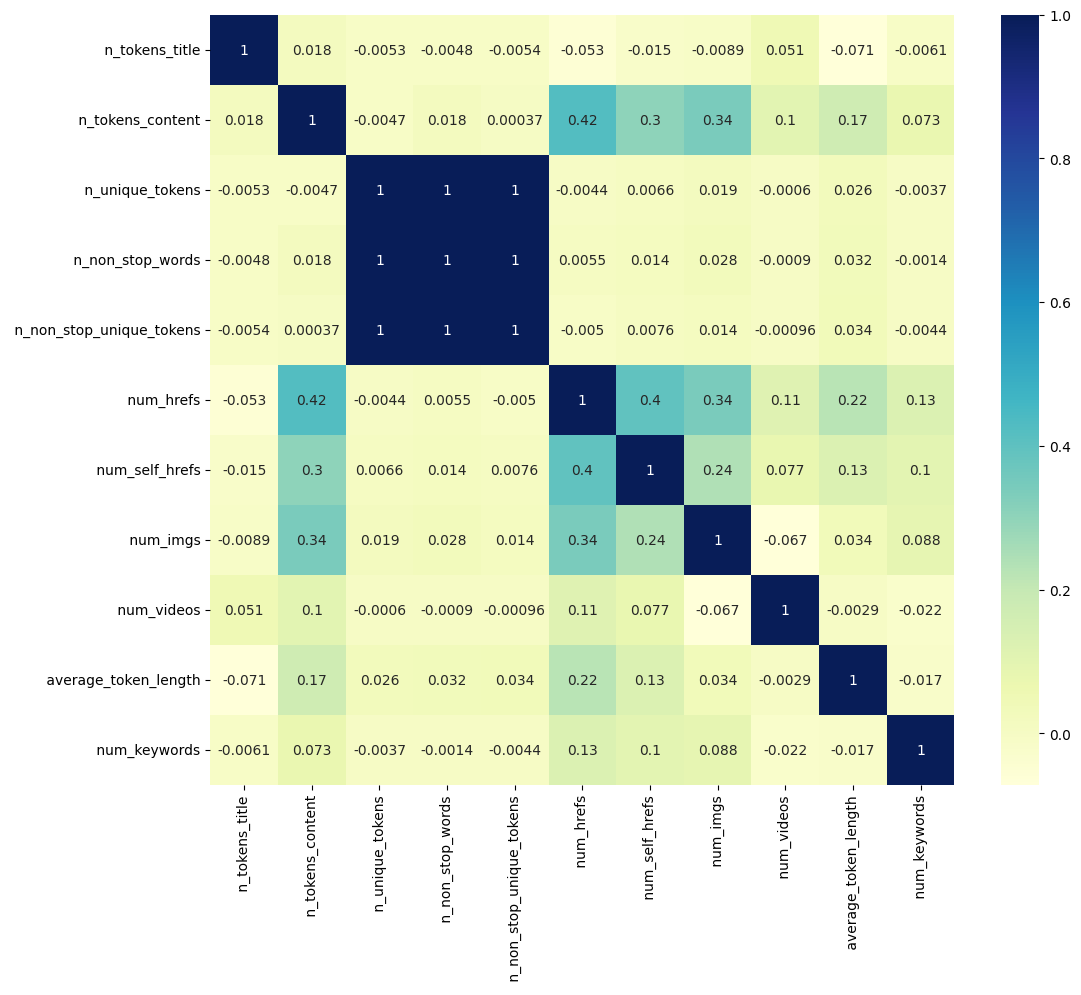

In [12]:
plt.figure(figsize=(12,10))
corr = num_of_content.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the num_of_content columns

From the heatmap above it can observed that there is highest correlation between n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens. 

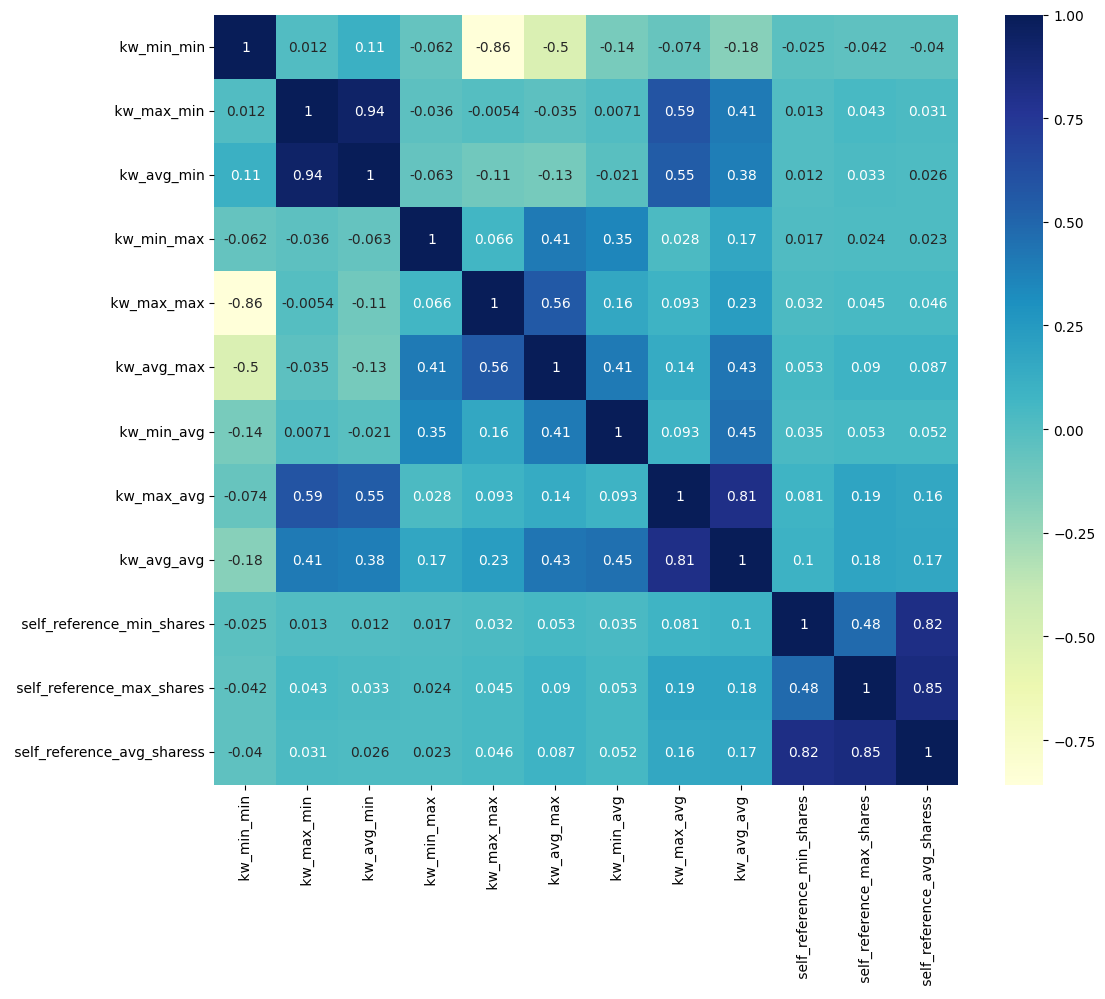

In [13]:
plt.figure(figsize=(12,10))
corr = keywords.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the keywords columns

From heatmap above it is observed that there is a high correlation between kw_max_min, kw_avg_min, and self_reference_max_shares, self_reference_avg_sharess

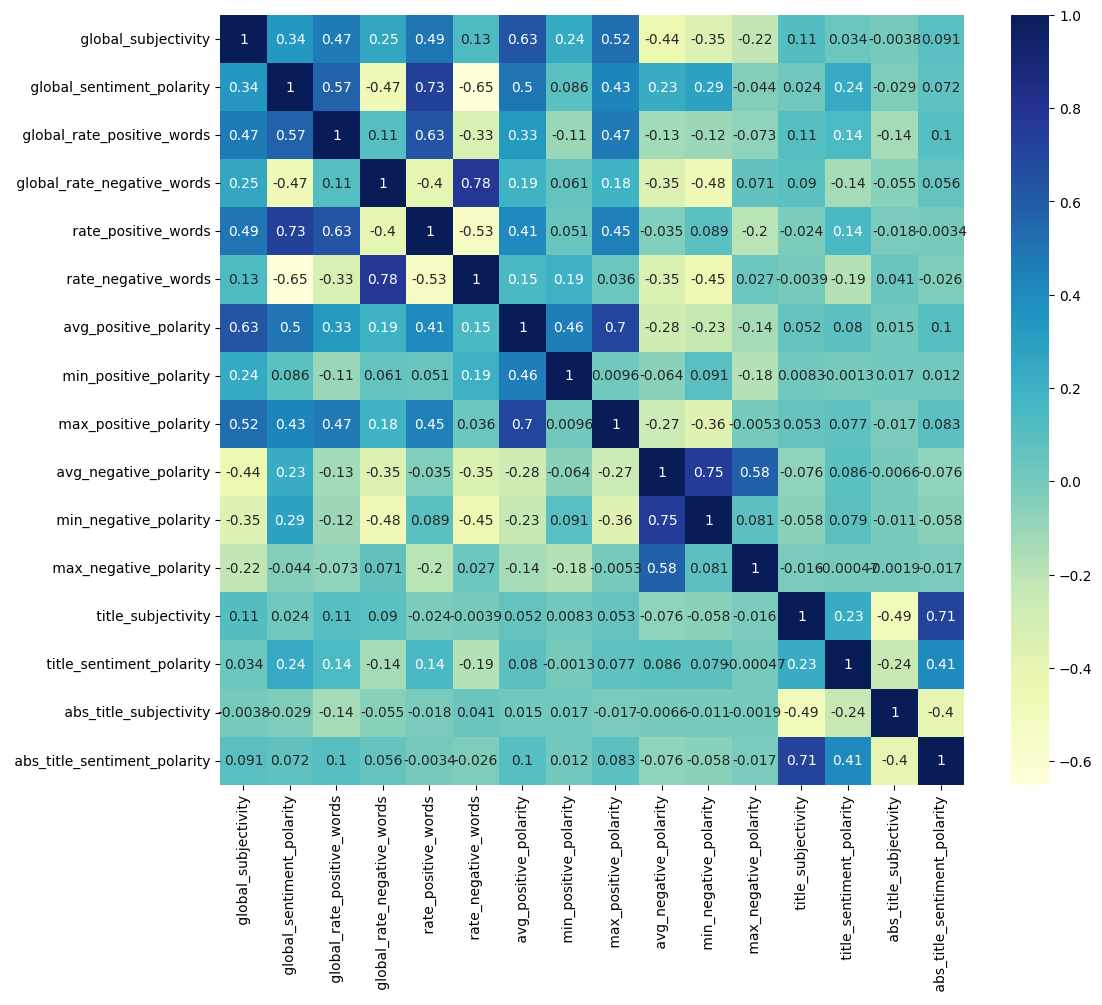

In [14]:
plt.figure(figsize=(12,10))
corr = sentiment.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the sentiment columns

here compared to num_of_contents and keywords which were highly coorelated having absolute value above 0.93, ones which are highly correlated has absolute value below 0.8

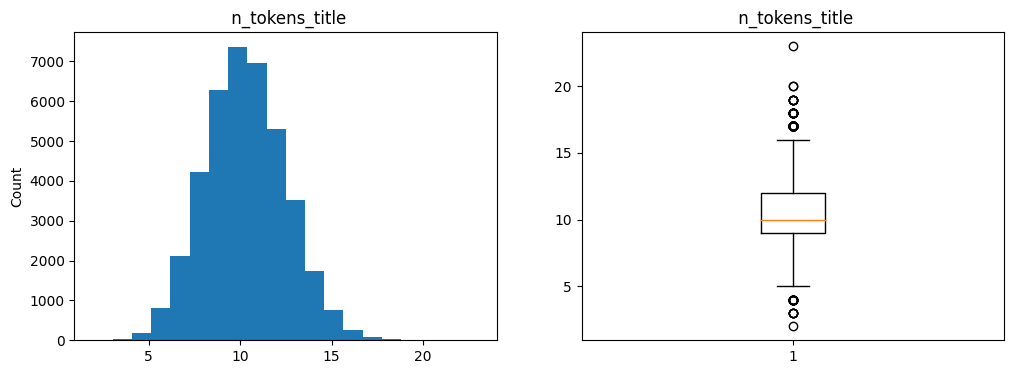

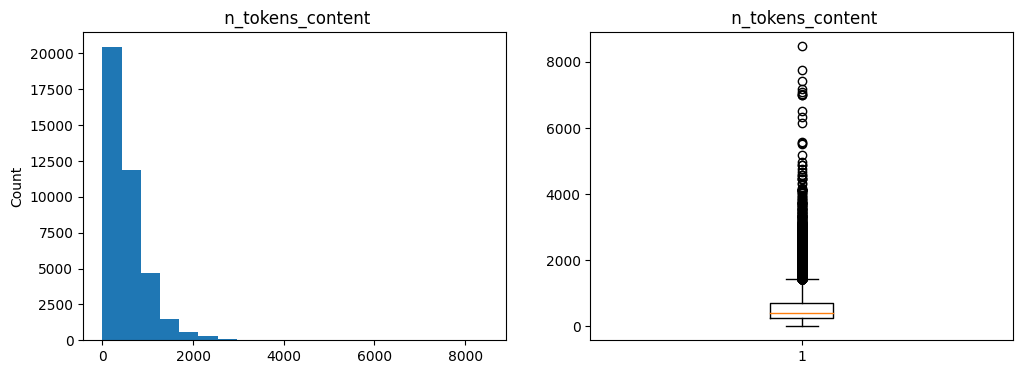

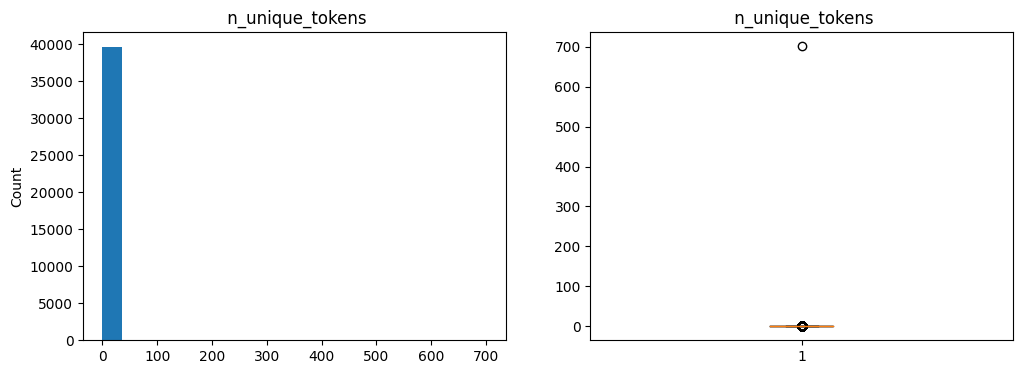

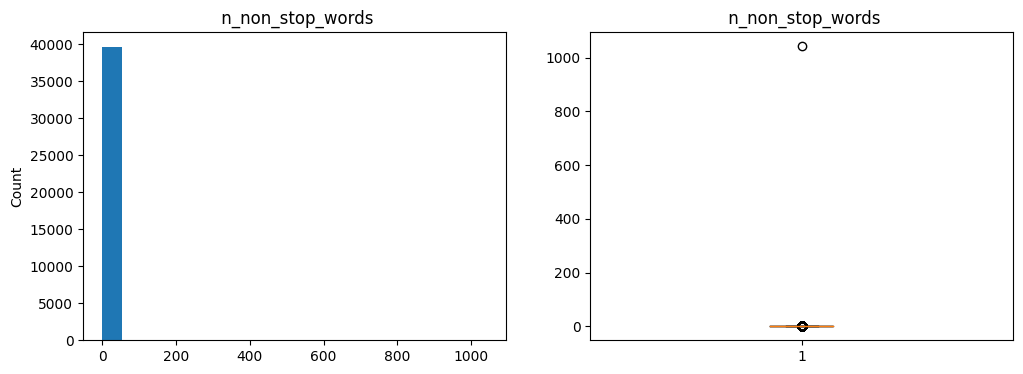

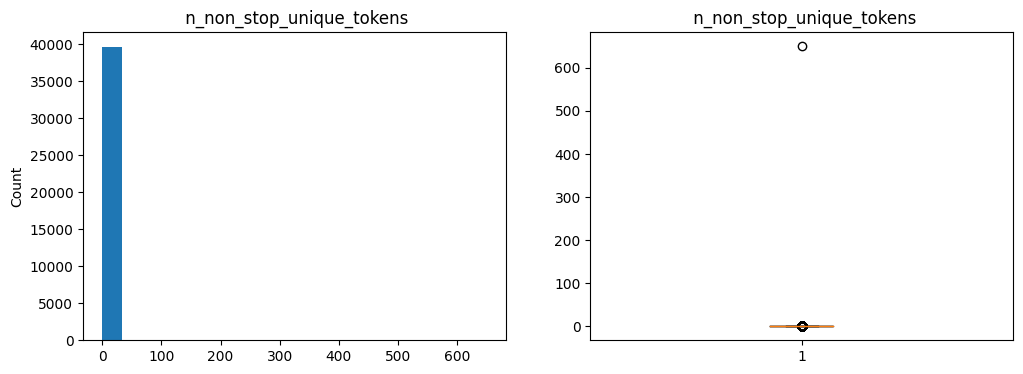

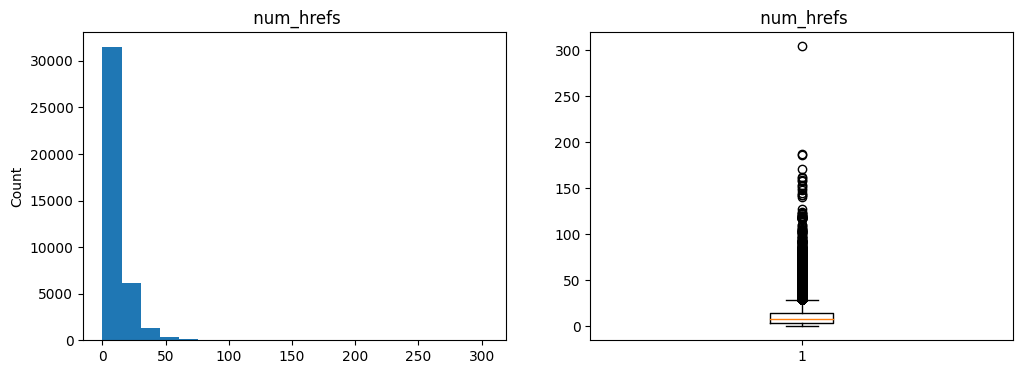

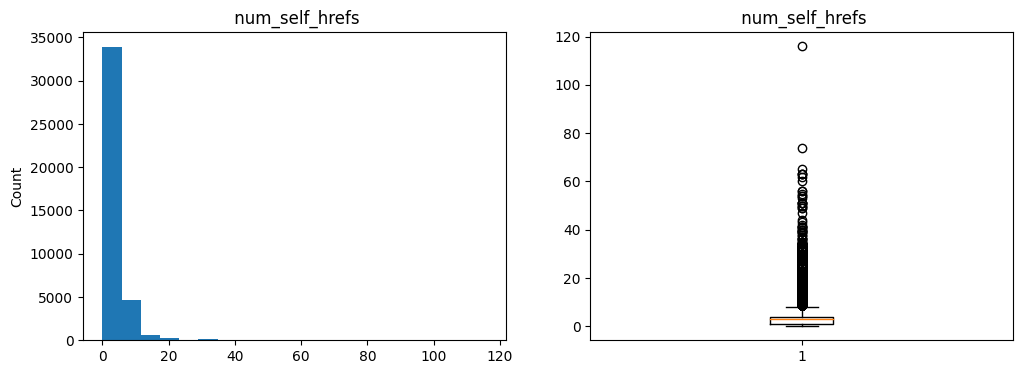

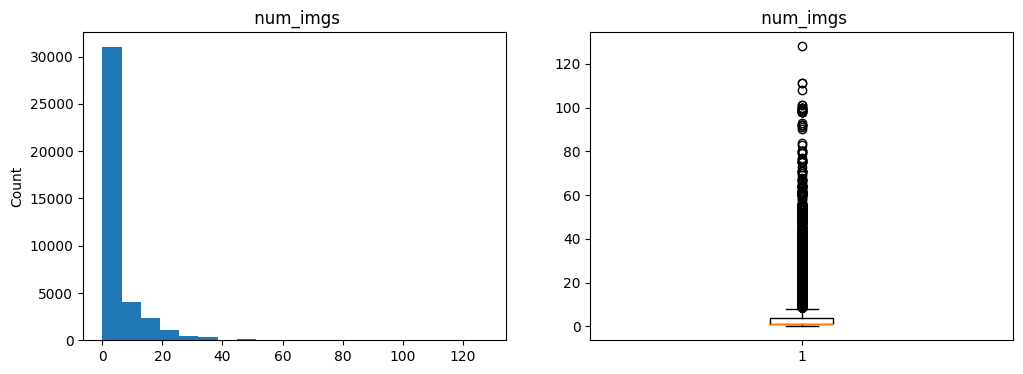

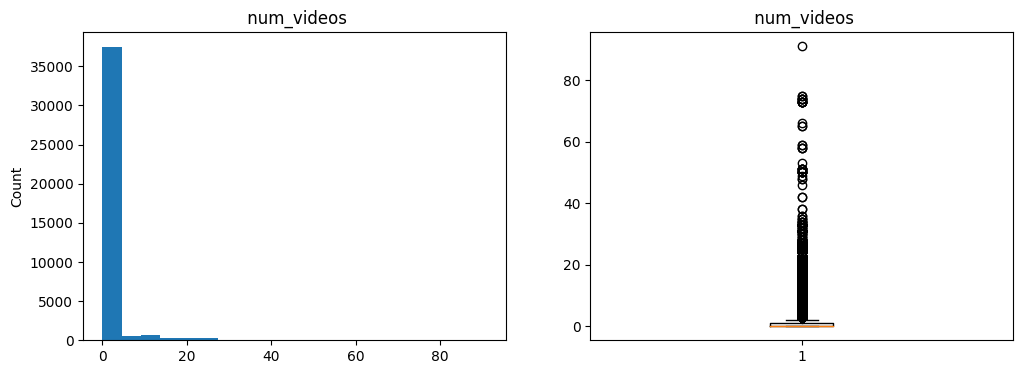

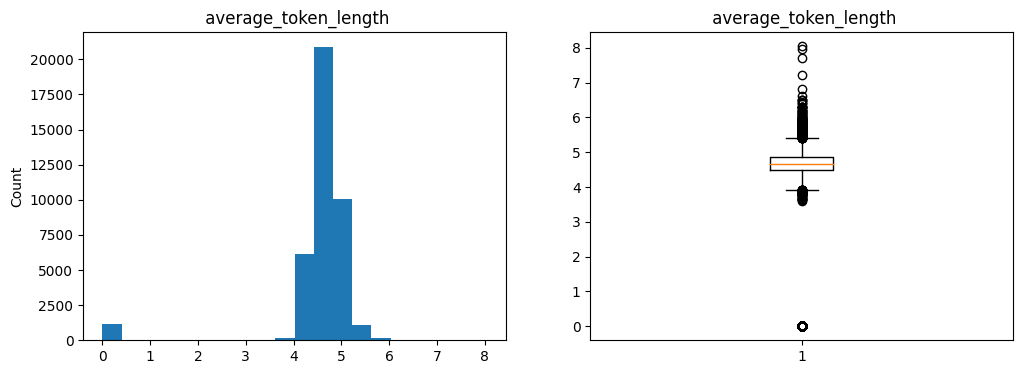

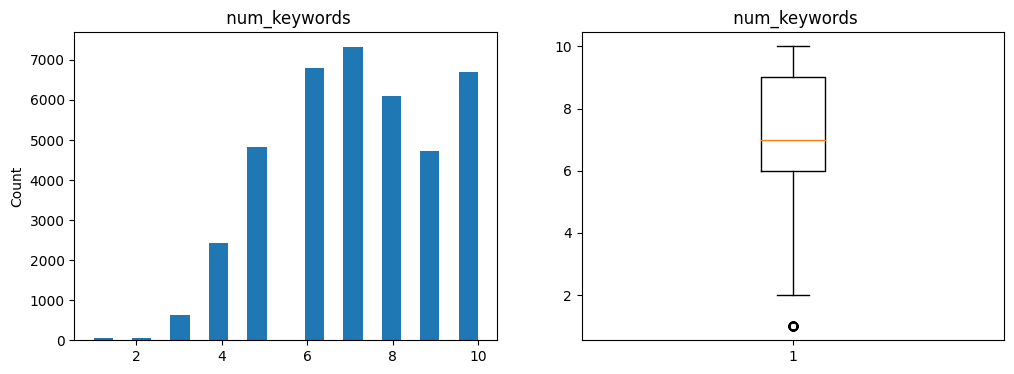

In [15]:
# for each column, create a histogram and boxplot side by side 
# for num_of_content columns 
for i in range(0,11):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=num_of_content.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(num_of_content.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(num_of_content.columns[i])
    plt.show()

we can see here that n_tokens_title is binomial distribution, others are moslty right skewed which need to be normalized.

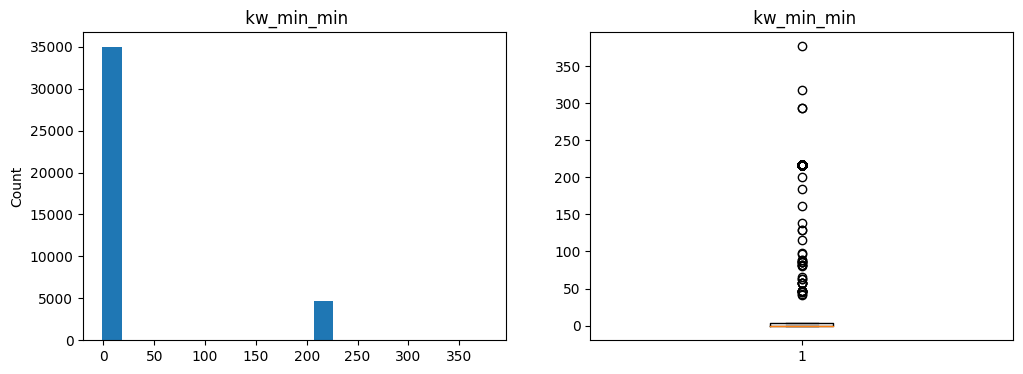

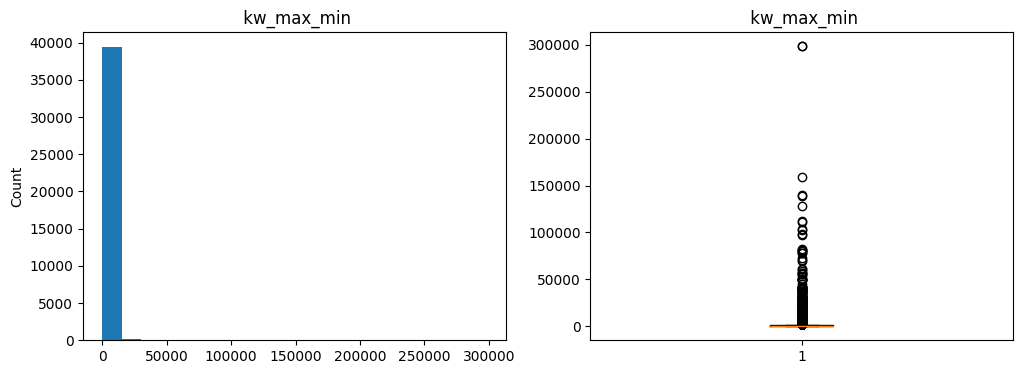

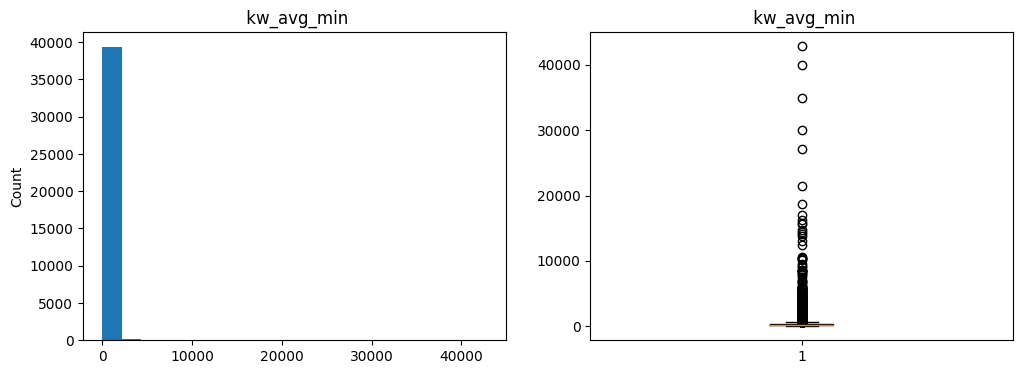

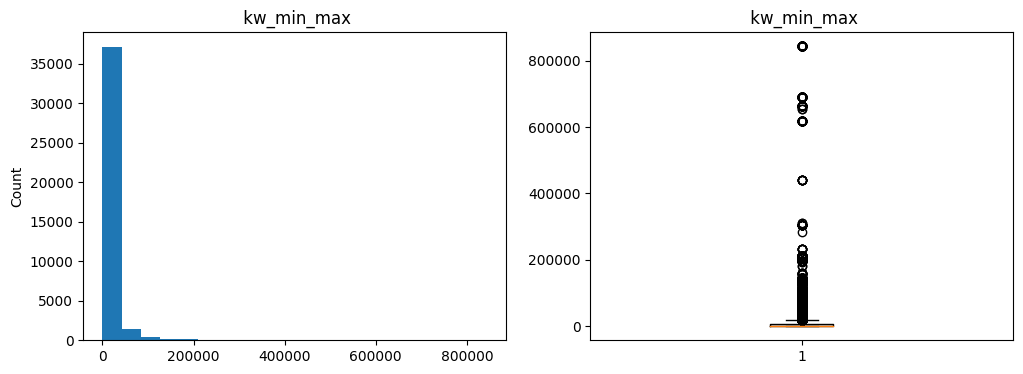

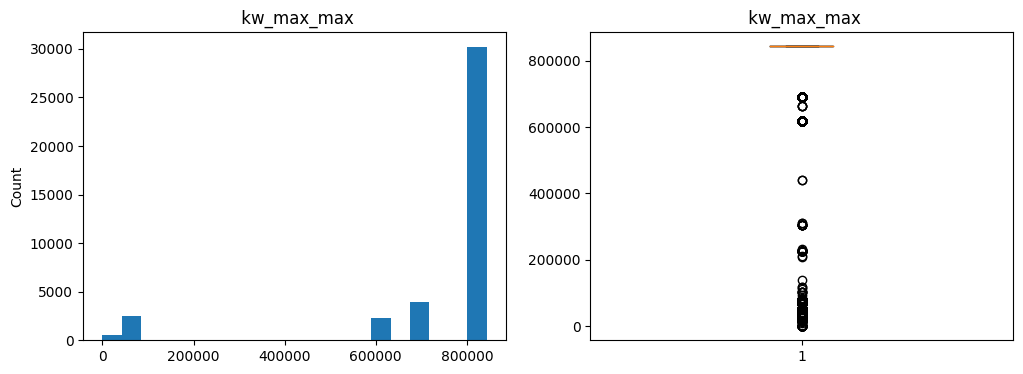

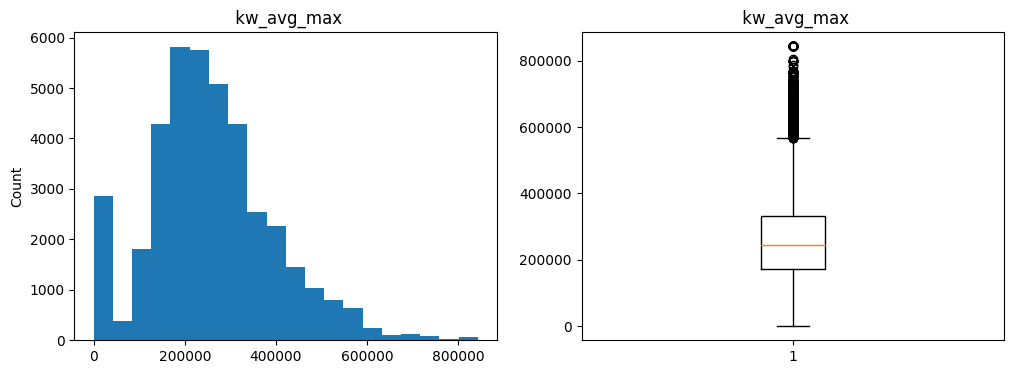

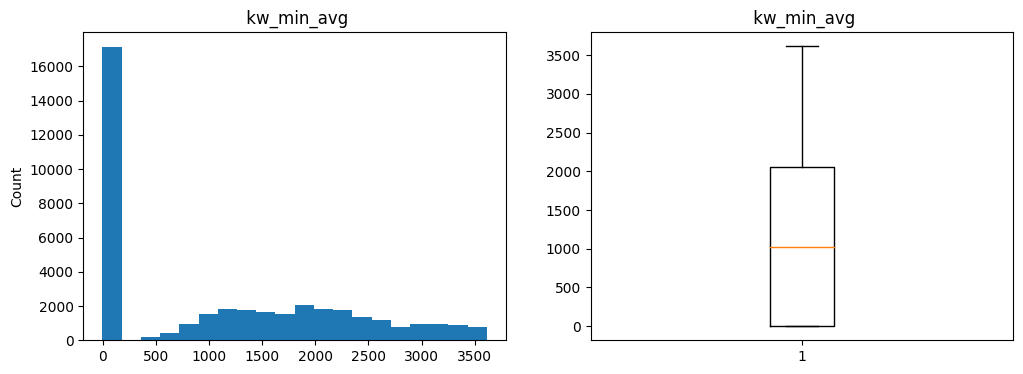

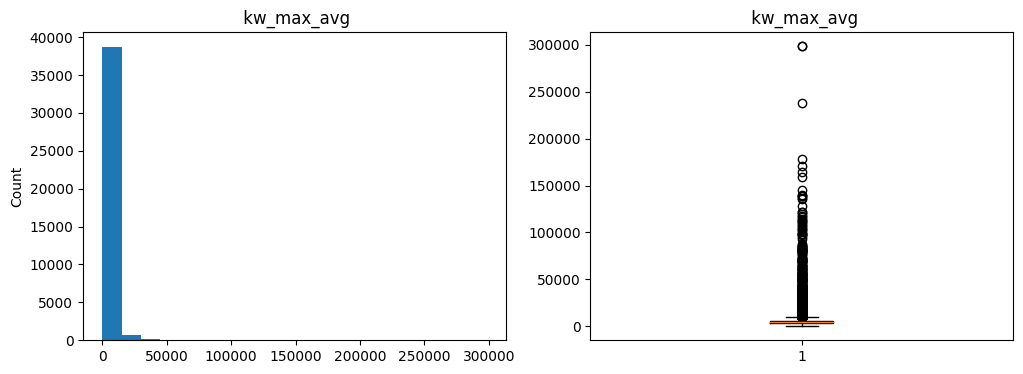

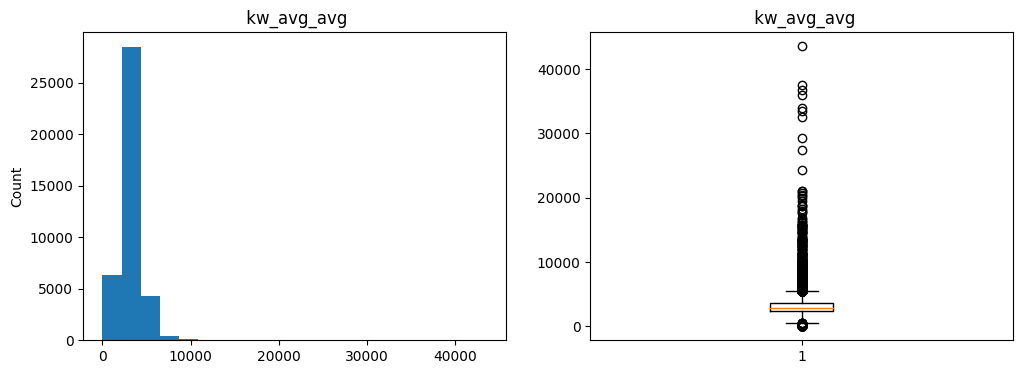

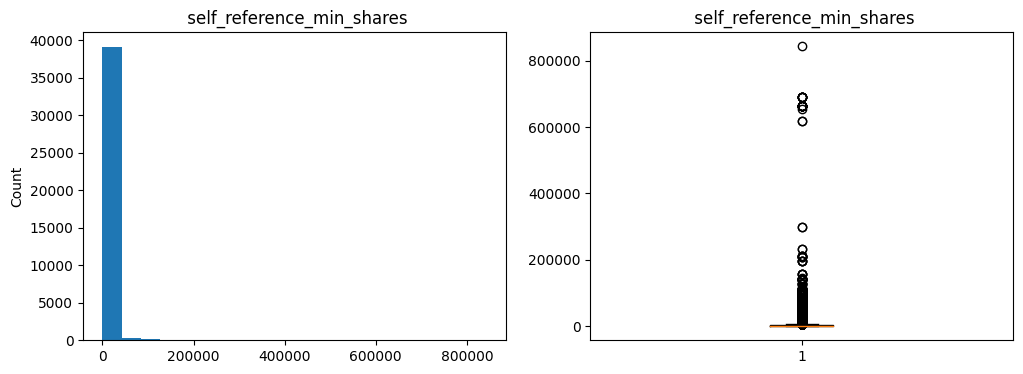

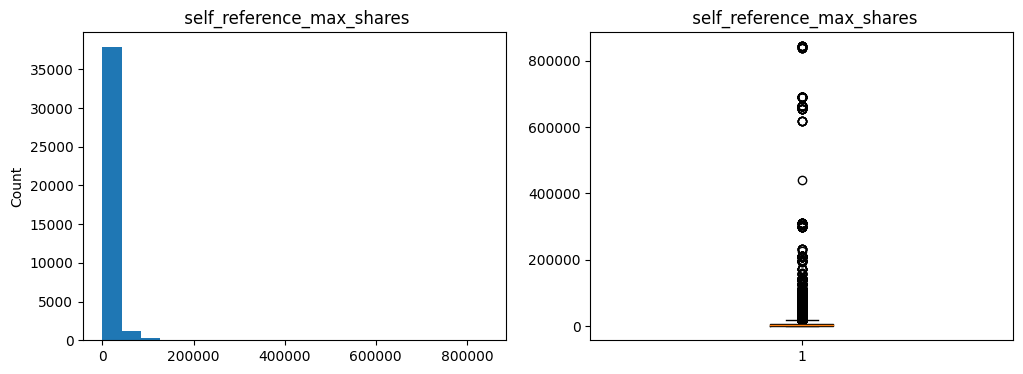

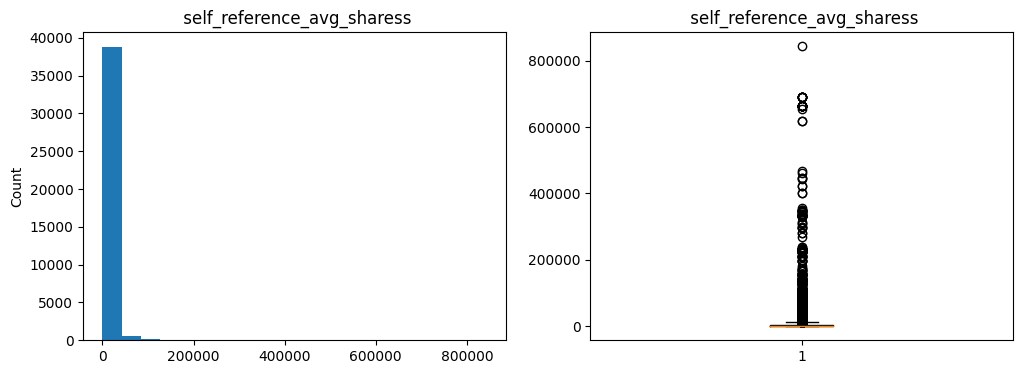

In [16]:
# for each column, create a histogram and boxplot side by side
# for keywords columns
for i in range(0,12):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=keywords.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(keywords.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(keywords.columns[i])
    plt.show()

In keywords too, we see that almost all columns are rightly skewed except kw_max_max which is left skewed with outliers. 

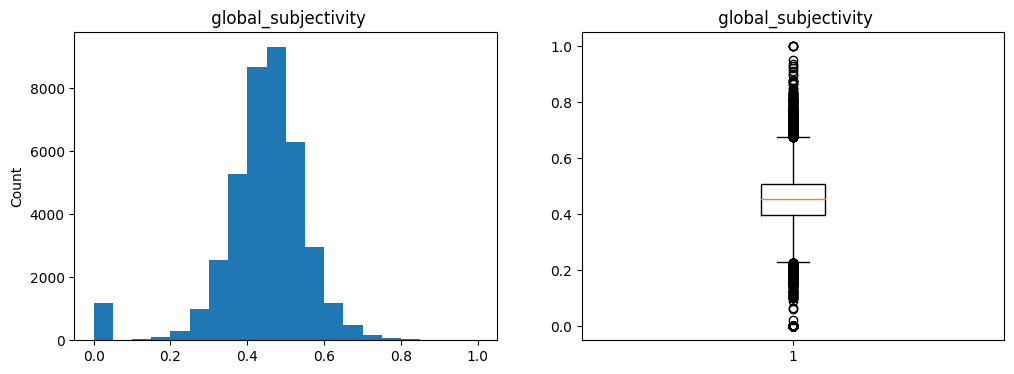

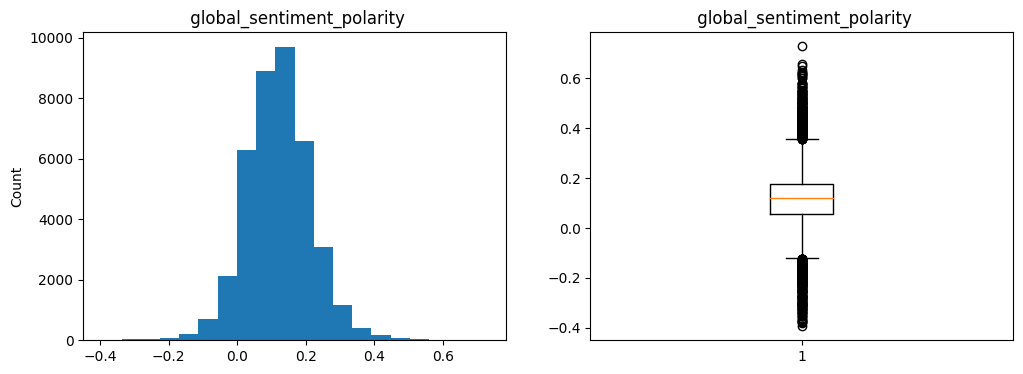

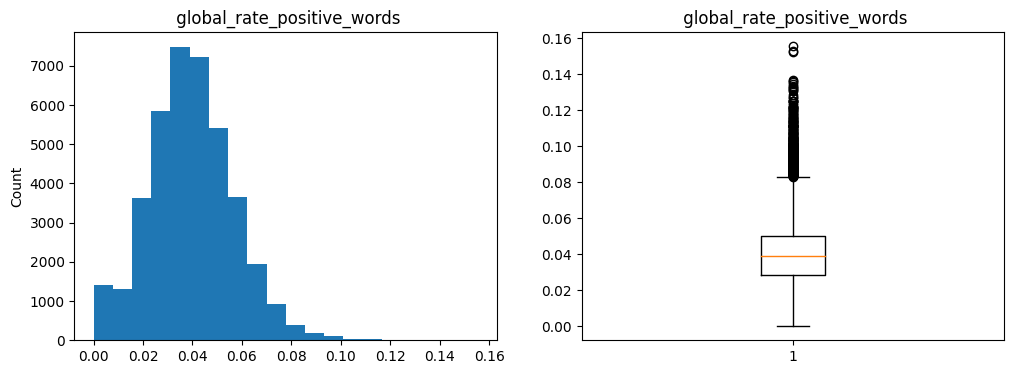

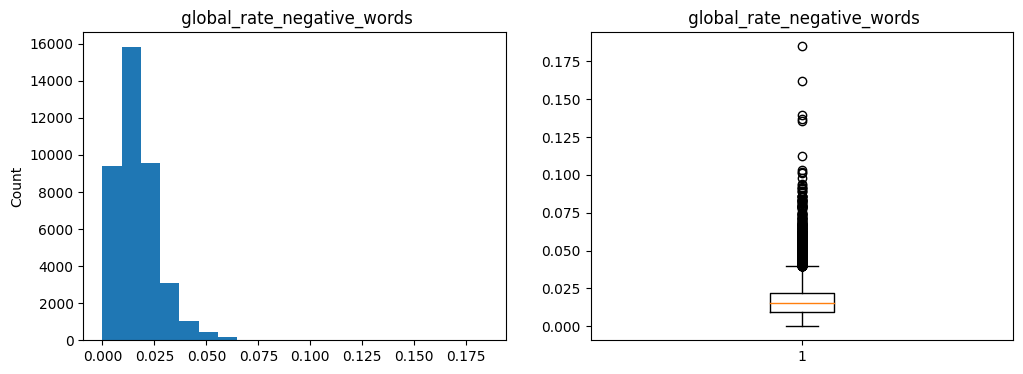

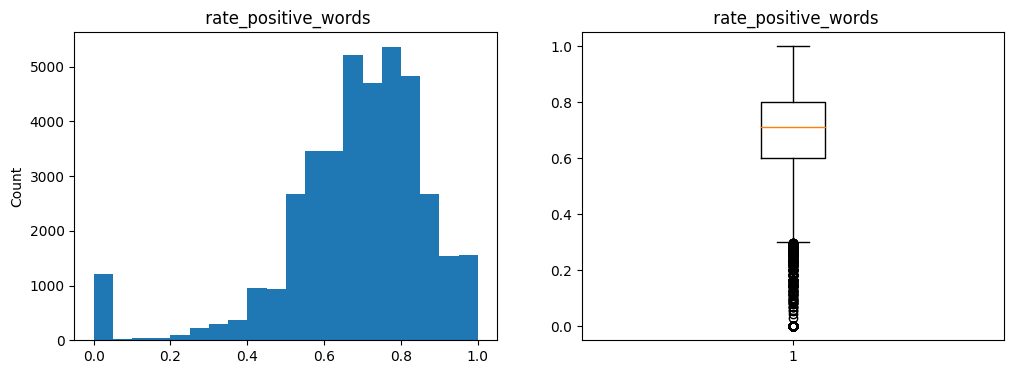

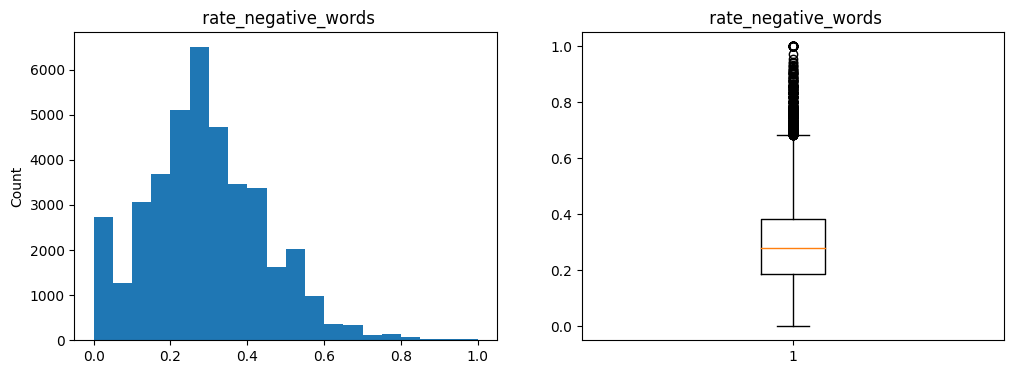

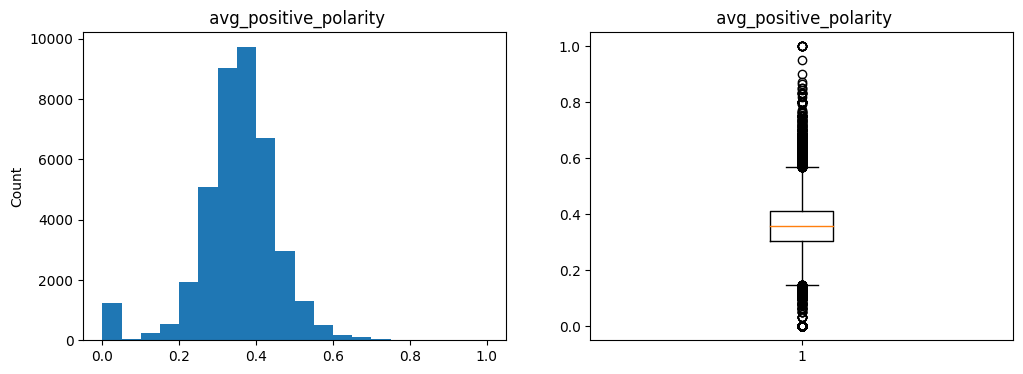

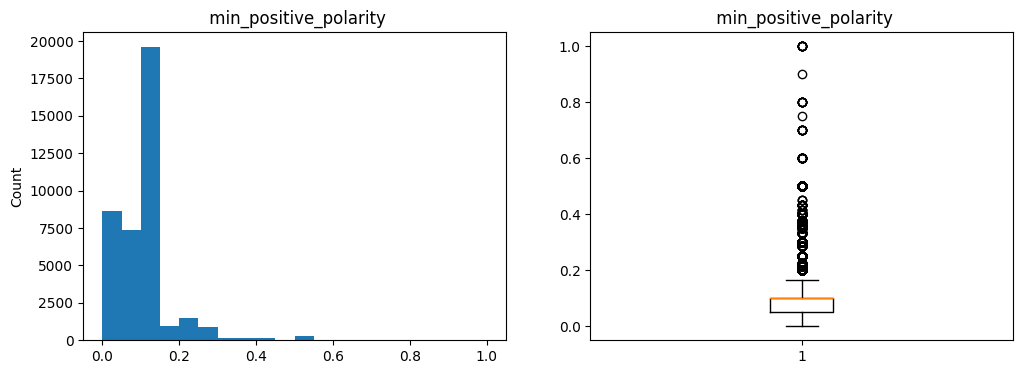

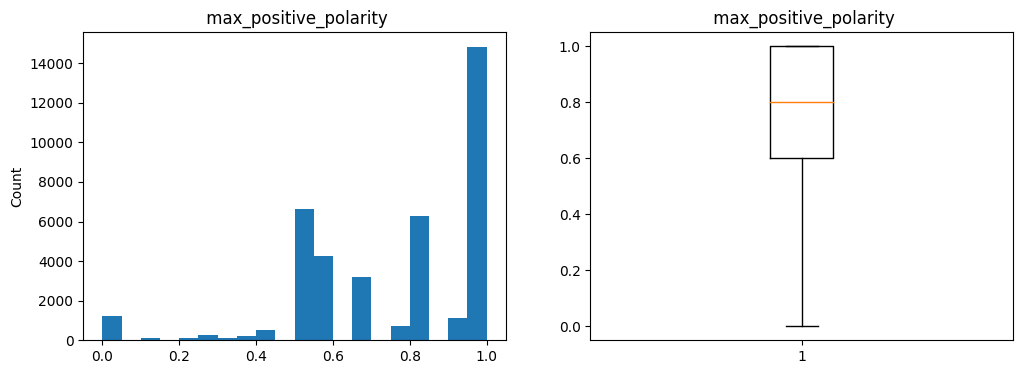

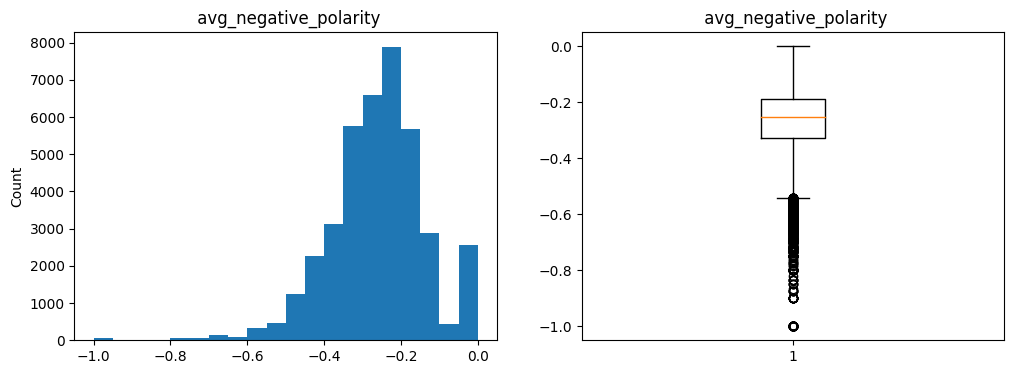

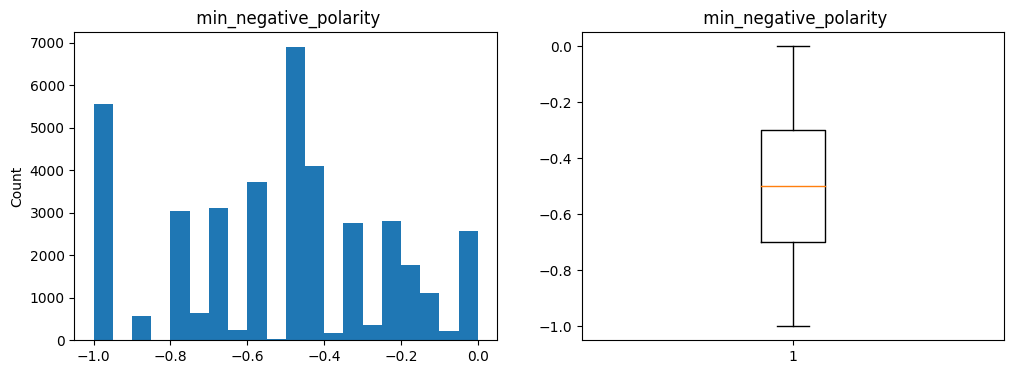

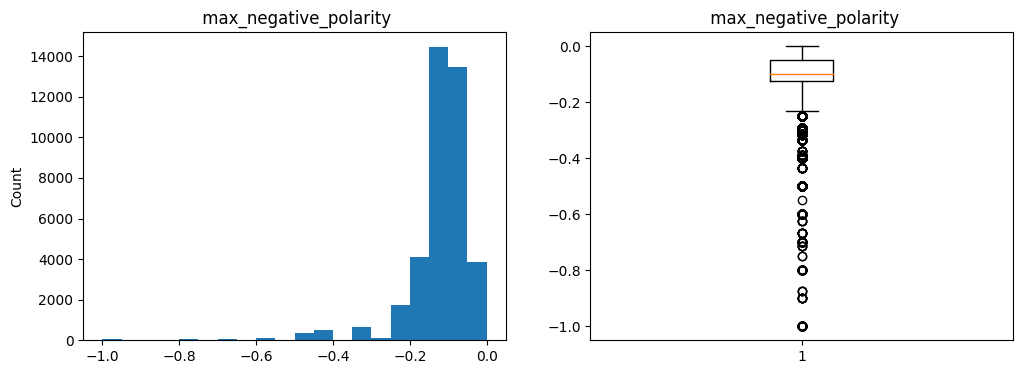

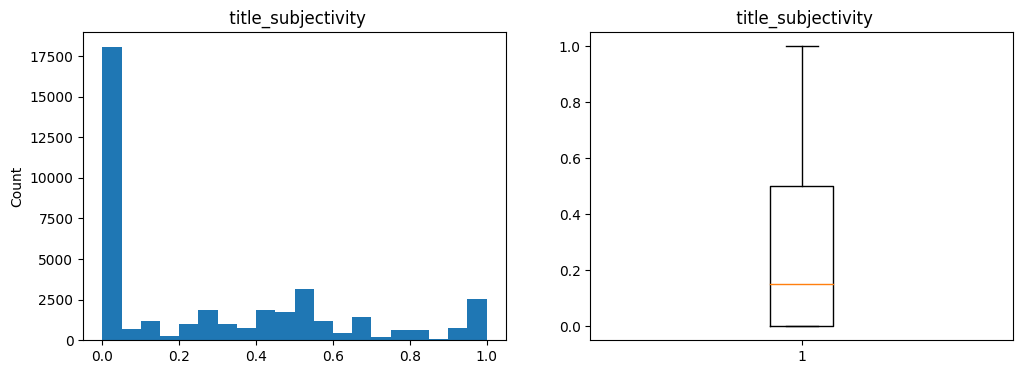

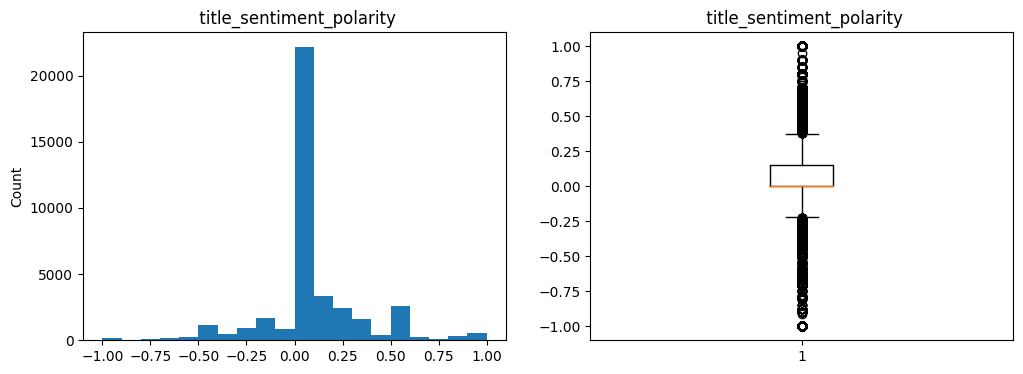

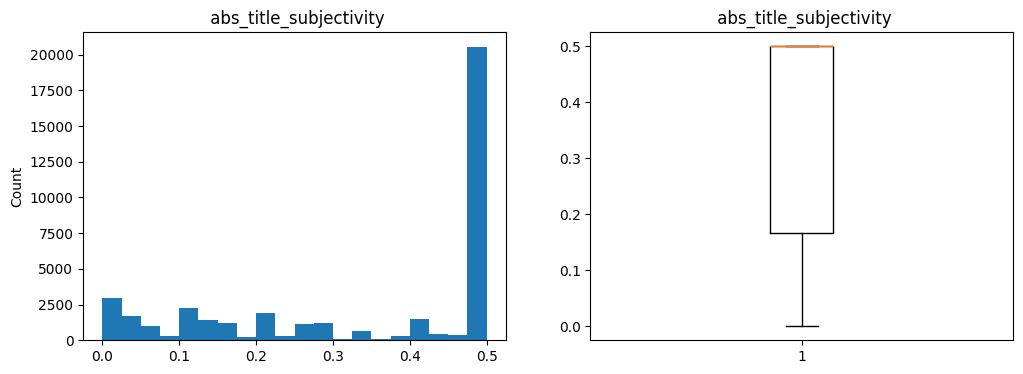

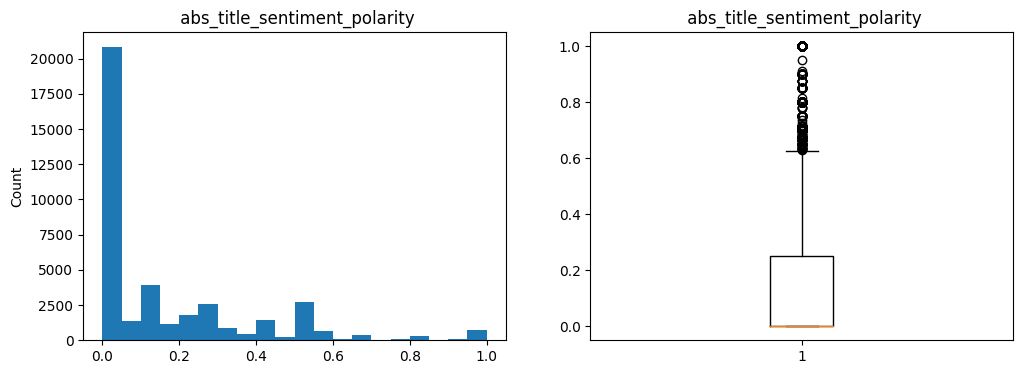

In [17]:
# for each column, create a histogram and boxplot side by side
# for sentiment columns 
for i in range(0,16):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=sentiment.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(sentiment.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(sentiment.columns[i])
    plt.show()

For sentiment columns inital columns are normally distributed whereas and later columns need to be normalized.

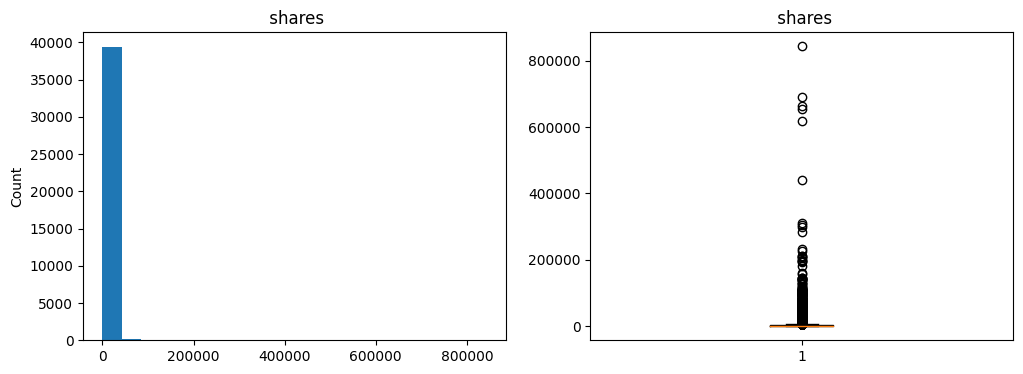

In [18]:
# for each column, create a histogram and boxplot side by side
# for Shares column 
for i in range(0,1):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=shares.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(shares.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(shares.columns[i])
    plt.show()

From the graph above it is evident that shares is rightly skewed with some outliers in the right. 

In [19]:
#dividing the column names into lists for further use
num_of_content1 = list(data.columns)[2:13]
data_channel1 = list(data.columns)[13:19]
keywords1 = list(data.columns)[19:31]
day_of_publish1 = list(data.columns)[31:39]
LDA_proximity1 = list(data.columns)[39:44]
sentiment1 = list(data.columns)[44:60]
shares1 =  list(data.columns)[60]

In [20]:
num_of_content1 #sanity check 

[' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords']

<Axes: >

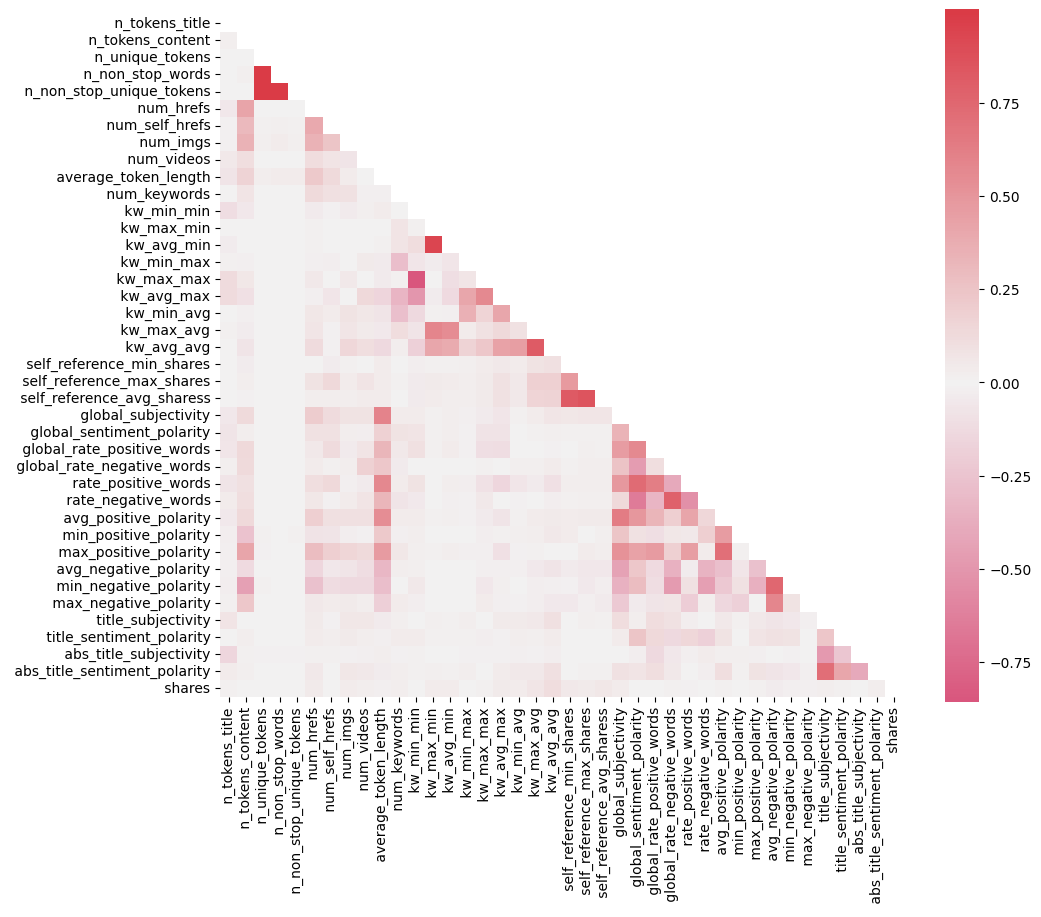

In [21]:
# Coorelation graph of num_of content + sentiment + keyword with response variable(shares)
corr = data[num_of_content1 + keywords1 + sentiment1 +[shares1]].corr() #using lists created above 
mask = np.triu(np.ones_like(corr, dtype = bool))
fig, axes = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True)

We can observe from above plot that shares which is response variable is not correlated to any other variables as such. 

Now we will plot and try to analyze and gather information about 'Categorical variables' 

In [22]:
# defining a function to plot categorical variables 
def cat_plot(df, col, rotate = False):
    plt.figure(figsize = (6,4))
    if rotate:
        plt.xticks(rotation = 75)
    plt.title('Count of ' + col.strip())
    sns.countplot(x = col, data = df)
    plt.tight_layout()
    plt.show()

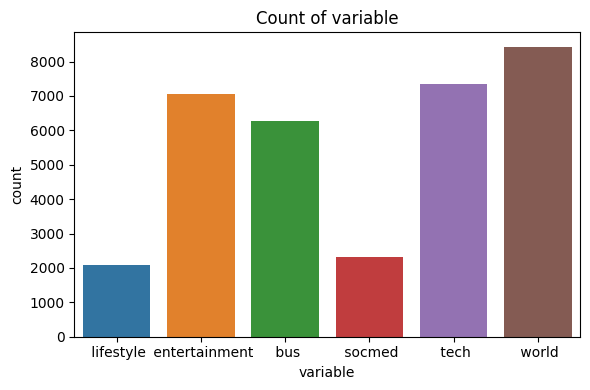

In [23]:
#using melt function to divide the categories of 'data_channel' columns 
melt_frame = pd.melt(data_channel)
melt_frame.variable = melt_frame.variable.str.replace("data_channel_is_", "")
cat_plot(melt_frame[melt_frame.value == 1], 'variable')

It is observed that lifestyle and social media has less articles compared to entertainment, business, tech and world.

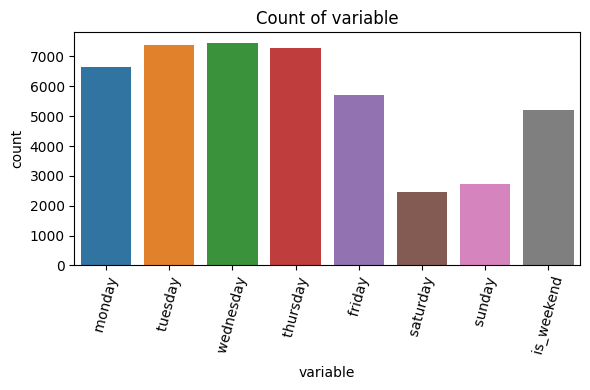

In [24]:
#using melt function to divide the categories of 'day_of_publish columns 
melt_frame = pd.melt(day_of_publish)
melt_frame.variable = melt_frame.variable.str.replace("weekday_is_", "")
cat_plot(melt_frame[melt_frame.value == 1], 'variable', True)

It is observed that fewer articles are published on saturday and sunday.

In [25]:
LDA_proximity #sanity check 

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
0,0.500331,0.378279,0.040005,0.041263,0.040123
1,0.799756,0.050047,0.050096,0.050101,0.050001
2,0.217792,0.033334,0.033351,0.033334,0.682188
3,0.028573,0.419300,0.494651,0.028905,0.028572
4,0.028633,0.028794,0.028575,0.028572,0.885427
...,...,...,...,...,...
39639,0.025038,0.025001,0.151701,0.025000,0.773260
39640,0.029349,0.028575,0.231866,0.681635,0.028575
39641,0.159004,0.025025,0.025207,0.643794,0.146970
39642,0.040004,0.040003,0.839987,0.040002,0.040004


In [26]:
#defining function filter to categorize data of shares attribute
def perct(x):
    if x <= 0.5*(data[' shares'].median()):
        return 'low'
    if (x > 0.5*(data[' shares'].median()) and x <= 1.5*(data[' shares'].median())):
        return 'medium'
    if x > 1.5*(data[' shares'].median()):
        return 'high'
    

In [27]:
#applying the perct function to 'reg_pct' column 
# To create a new categorical indicator variable derived from the content of the reg_pct attribute
data['share_level'] = data[' shares'].apply(perct)

In [28]:
data #sanity check

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,share_level
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,low
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,medium
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,medium
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,medium
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,medium
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,medium
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,medium
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,medium


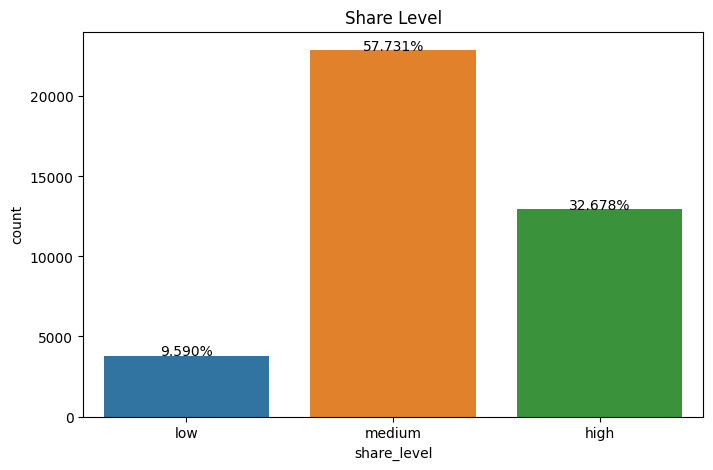

In [29]:
# count plot on single categorical variable
plt.figure(figsize=(8, 5))
ax = sns.countplot(x = 'share_level', data = data)
plt.title('Share Level')
#display the percentage above the bar 
total = len(data['share_level'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3,
            '{:1.3f}%'.format(100*(height/total)),
            ha="center")

In [30]:
#Assign 1,2,3 for low, medium and high values respectively in dropout_pct_level column of dataset 
data['share_level'] = data['share_level'].map({'low': 0, 'medium': 1, 'high':2}) 

##### Now we will normalize the numeric variable values

In [31]:
numericsc= num_of_content1 + keywords1 + sentiment1

In [32]:
# importing power_transform for normalization
from sklearn.preprocessing import power_transform
standardized_data = pd.DataFrame(power_transform(data[numericsc]), columns = numericsc)
standardized_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.768359,-0.720956,0.861365,0.165674,0.781136,-0.693423,-0.149019,-0.290008,-0.749604,0.022536,...,0.186416,0.340736,-0.430519,-0.741268,-0.295958,-1.325929,0.929000,-0.981993,-1.539498,0.714262
1,-0.644399,-0.582079,0.511983,0.165674,0.664751,-0.957425,-0.740154,-0.290008,-0.749604,0.677491,...,-0.695517,-1.210459,-0.430519,1.128380,1.395032,-0.188209,-0.988237,-0.241250,0.885498,-0.885549
2,-0.644399,-0.753699,0.330606,0.165674,-0.000646,-0.957425,-0.740154,-0.290008,-0.749604,-0.669620,...,1.454708,0.340736,1.111049,-1.559161,-0.958965,-0.654181,-0.988237,-0.241250,0.885498,-0.885549
3,-0.644399,0.213271,-0.122812,0.165674,0.008904,0.153481,-1.767673,-0.290008,-0.749604,-0.644056,...,0.261015,0.903776,0.014270,-0.884501,-0.295958,-1.026510,-0.988237,-0.241250,0.885498,-0.885549
4,1.216605,1.214913,-0.718135,0.165674,-0.691796,1.042550,2.522405,1.660464,-0.749604,0.029020,...,0.521868,-1.210459,1.111049,0.261996,0.045235,0.749035,0.829896,0.274592,-1.437283,0.423477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.309590,-0.277999,0.040511,0.165674,0.111594,0.153481,1.251290,-0.290008,1.062406,-0.371357,...,-0.256656,0.340736,-0.216161,-0.057273,0.045235,-0.547410,-0.395733,-0.241250,0.110133,-0.885549
39640,0.768359,-0.333828,1.049465,0.165674,1.118071,0.153481,1.251290,0.558841,1.944837,-0.642740,...,0.147867,0.903776,-0.430519,0.336380,0.393643,-0.188209,0.414200,3.219244,-0.950557,1.821954
39641,-0.160861,-0.007013,-0.041182,0.165674,-0.107914,1.338081,-0.740154,1.436243,1.062406,1.189318,...,-0.507941,0.903776,-1.141007,-0.788337,-0.958965,-1.026510,0.829896,0.274592,-1.437283,0.423477
39642,-2.193336,0.539768,0.107113,0.165674,0.153491,0.273184,-0.740154,-0.290008,-0.749604,0.864498,...,-1.137363,-0.430438,-1.141007,0.384740,0.045235,1.711668,-0.988237,-0.241250,0.885498,-0.885549


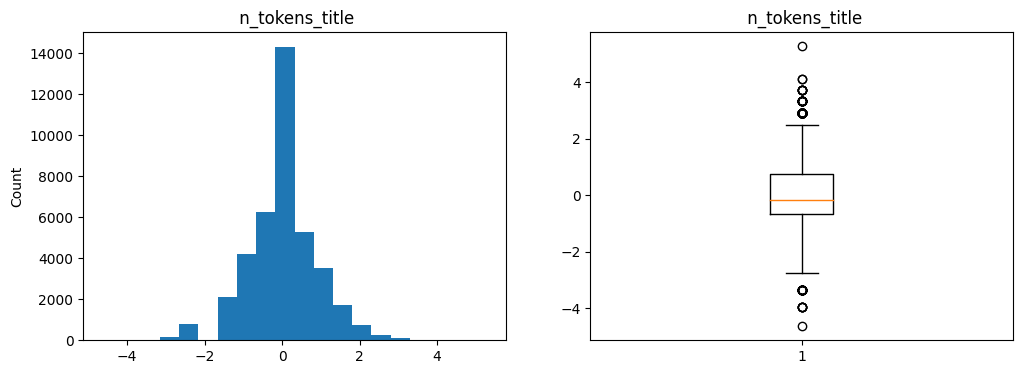

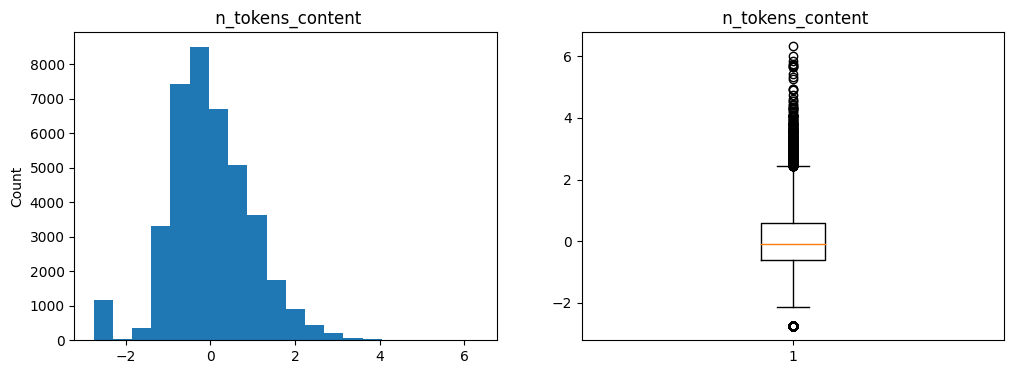

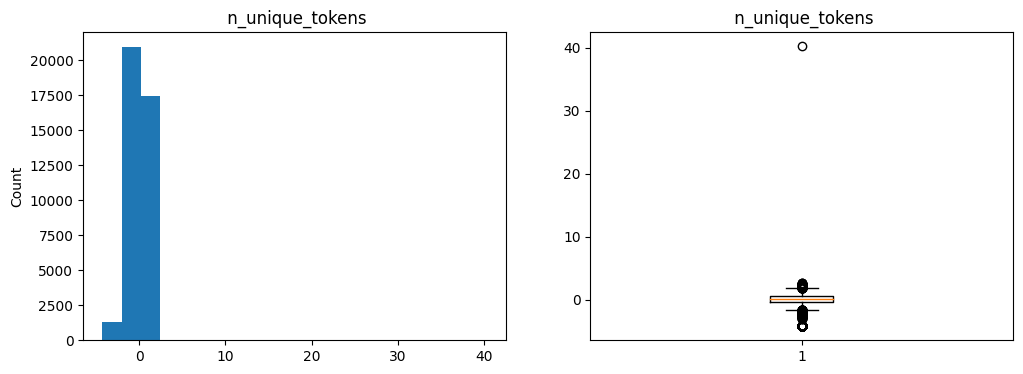

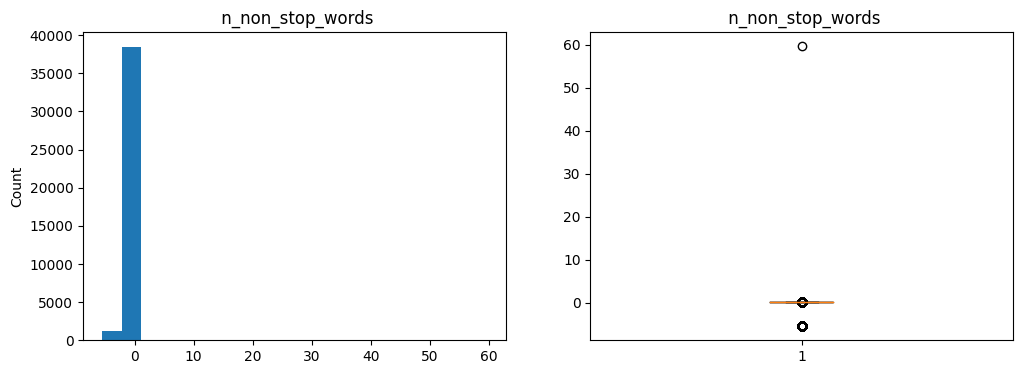

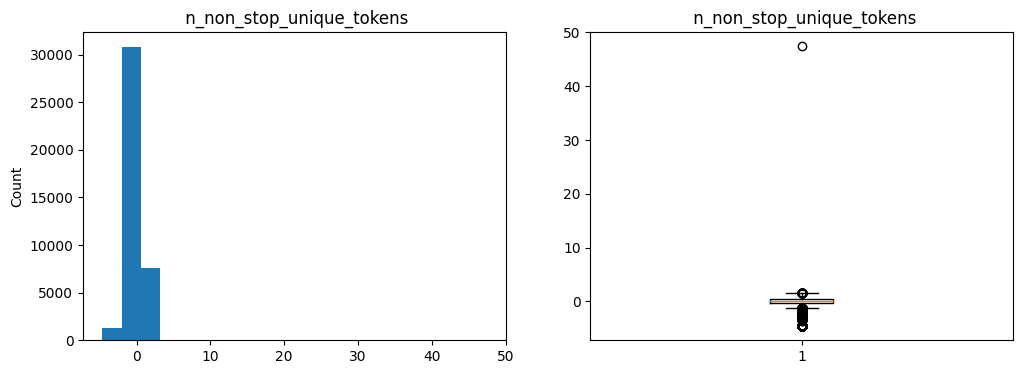

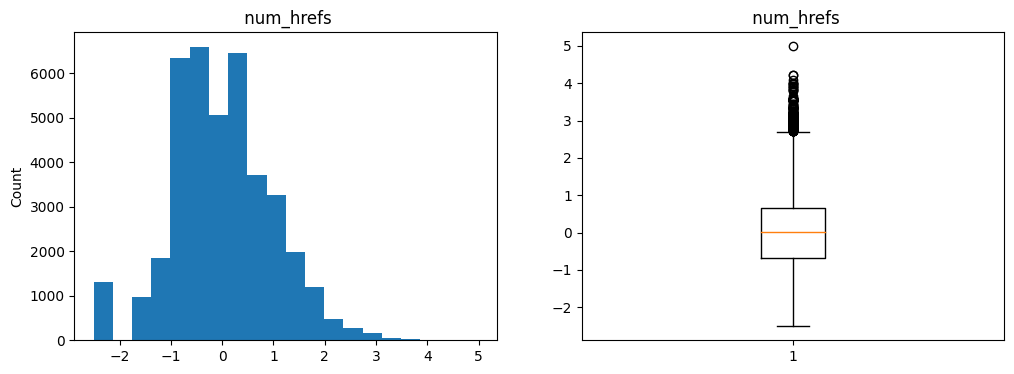

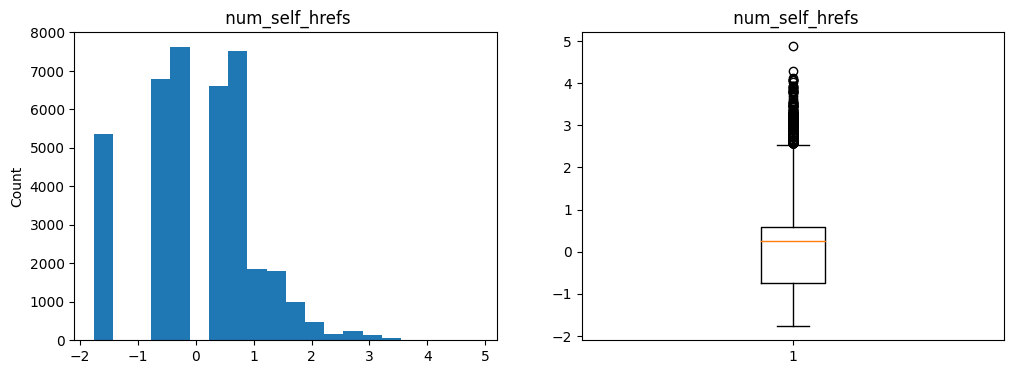

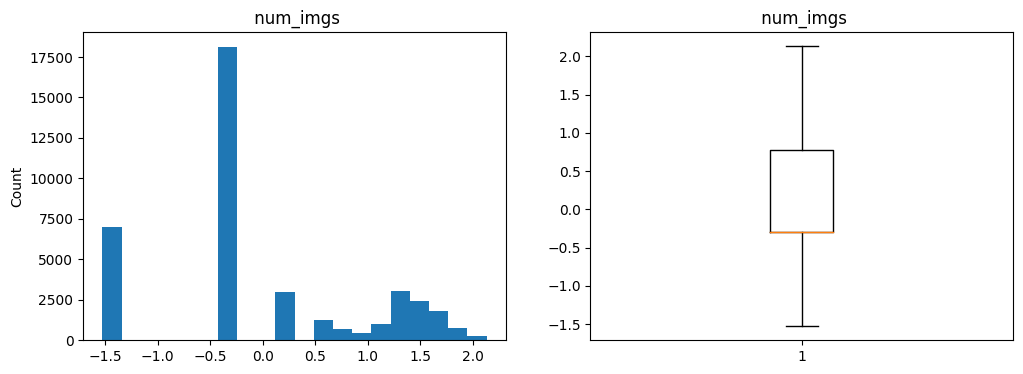

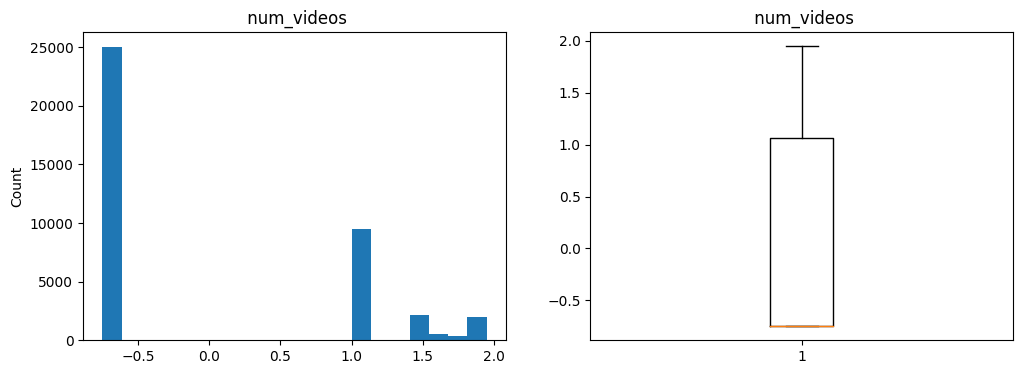

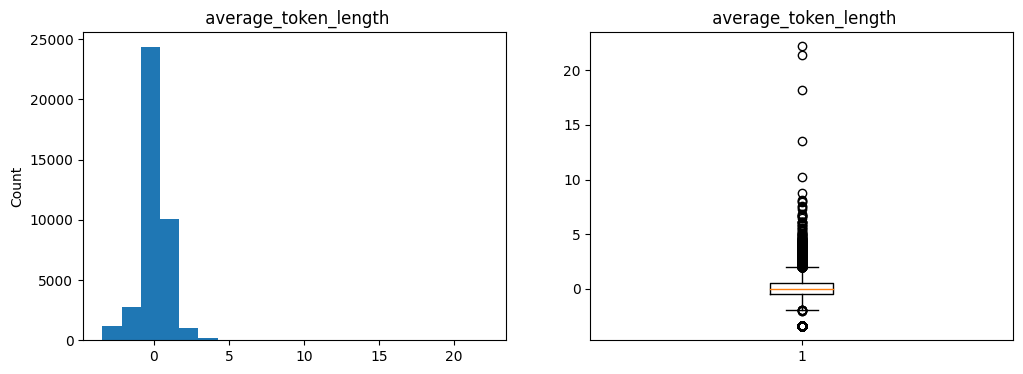

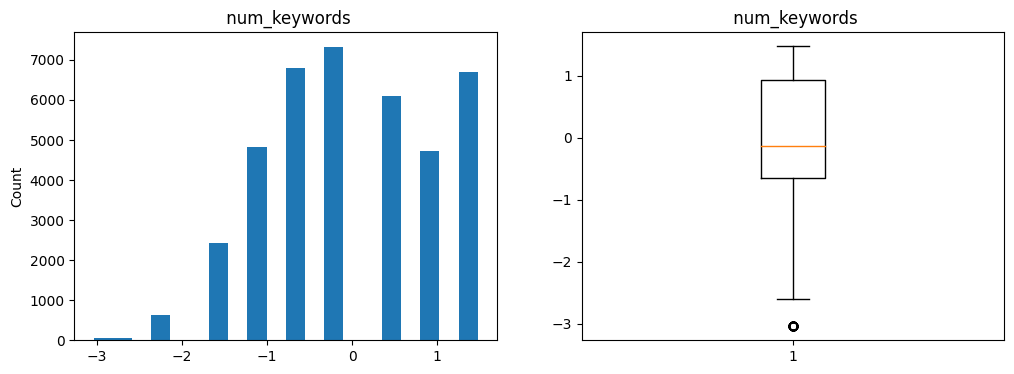

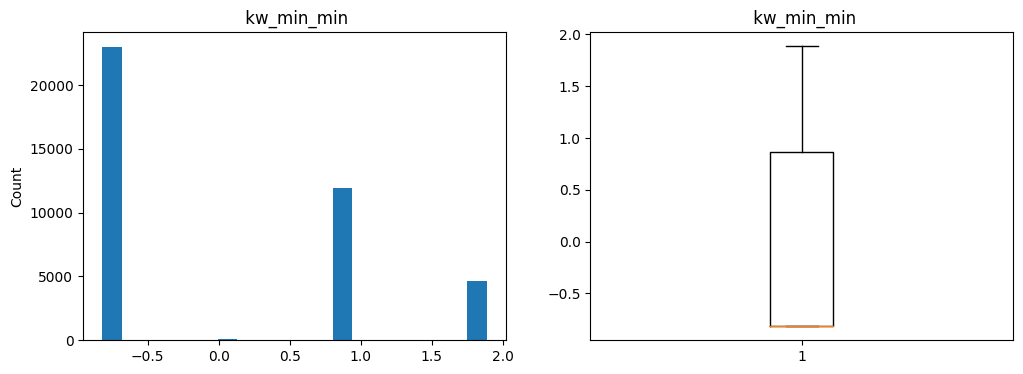

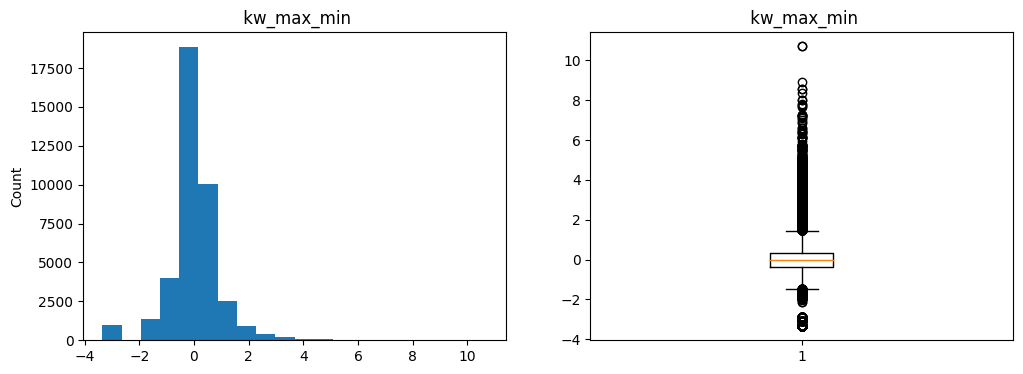

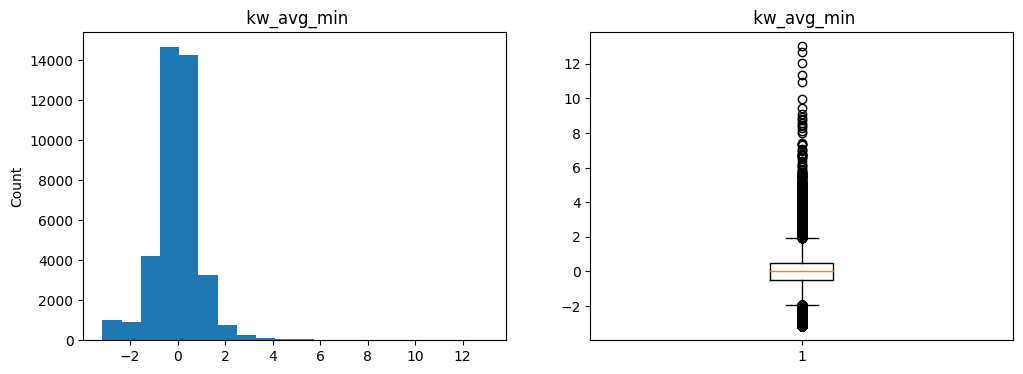

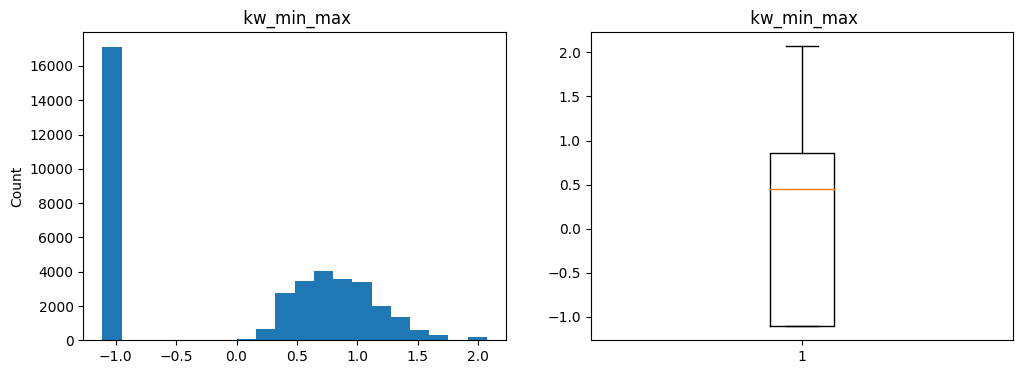

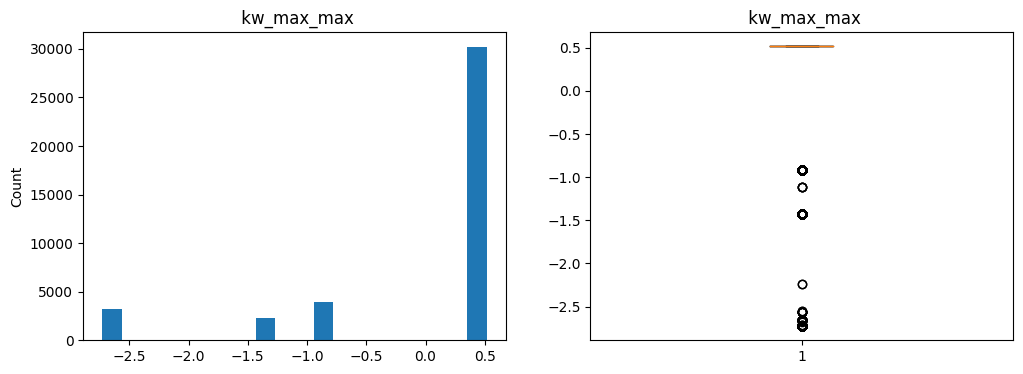

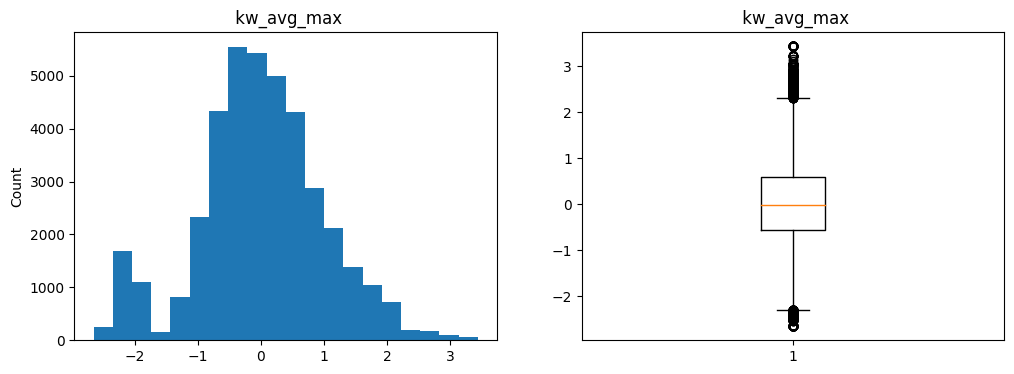

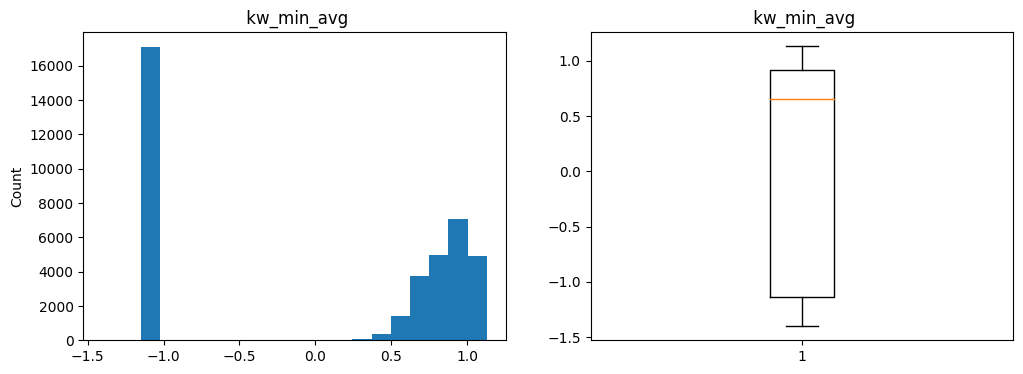

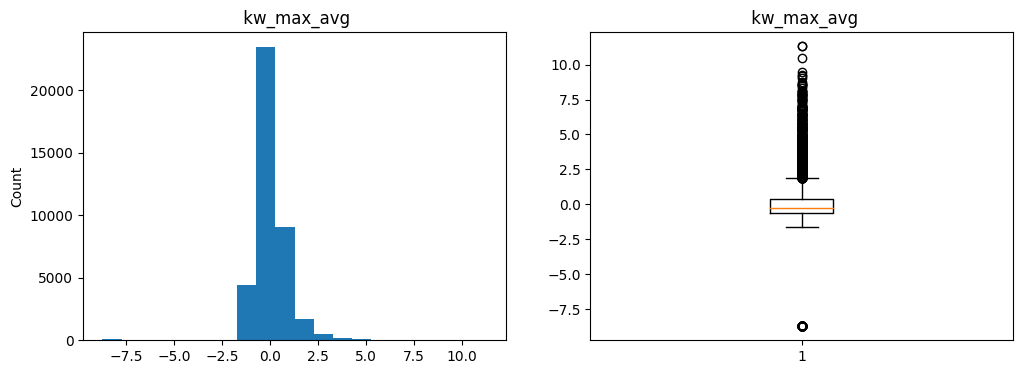

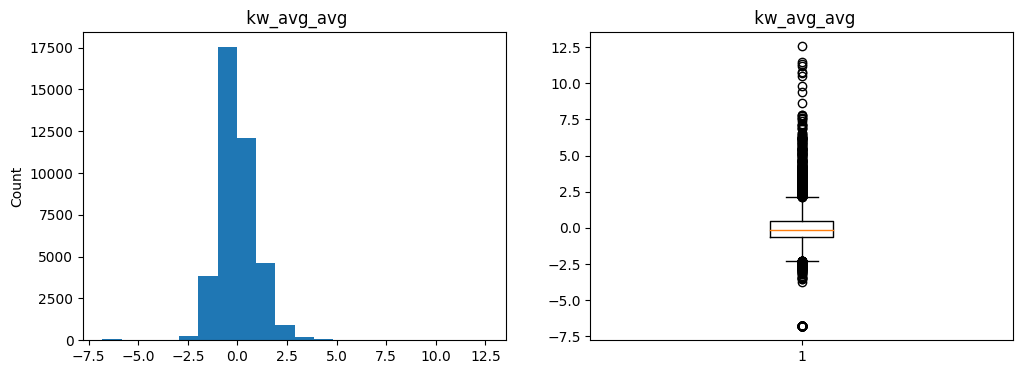

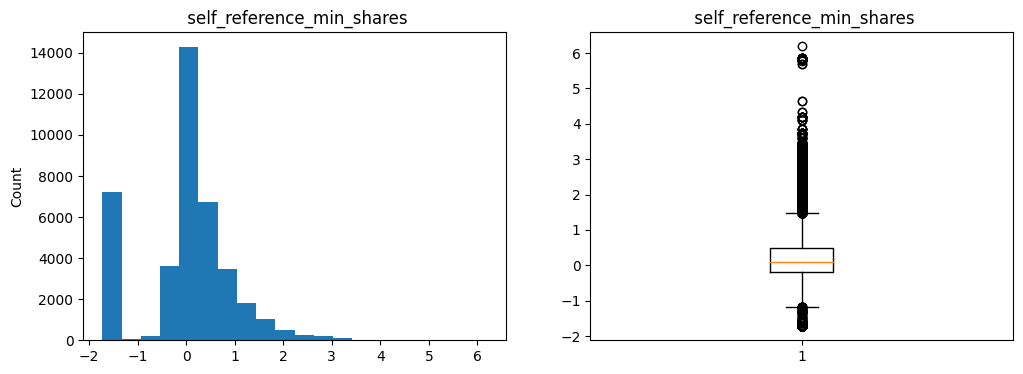

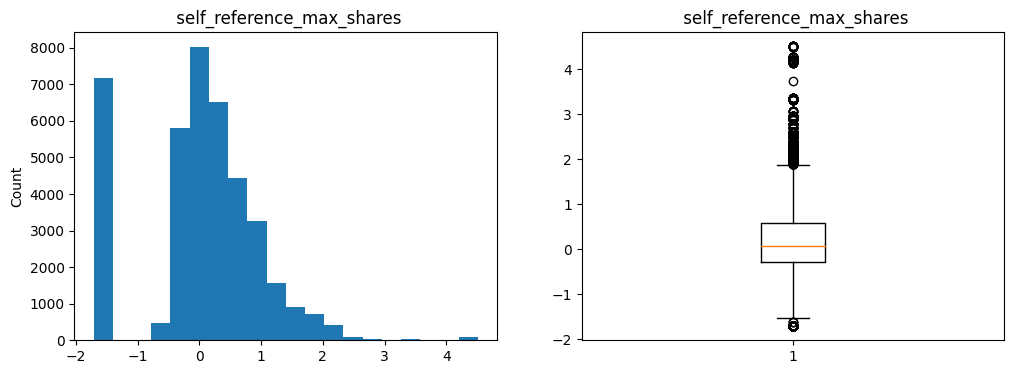

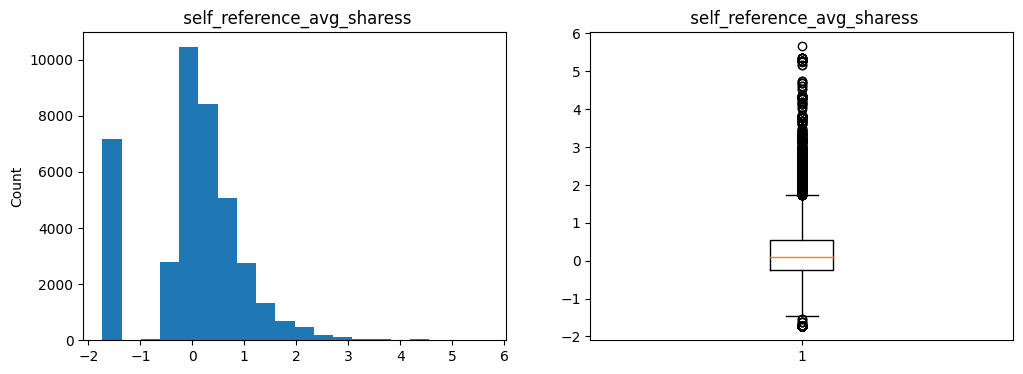

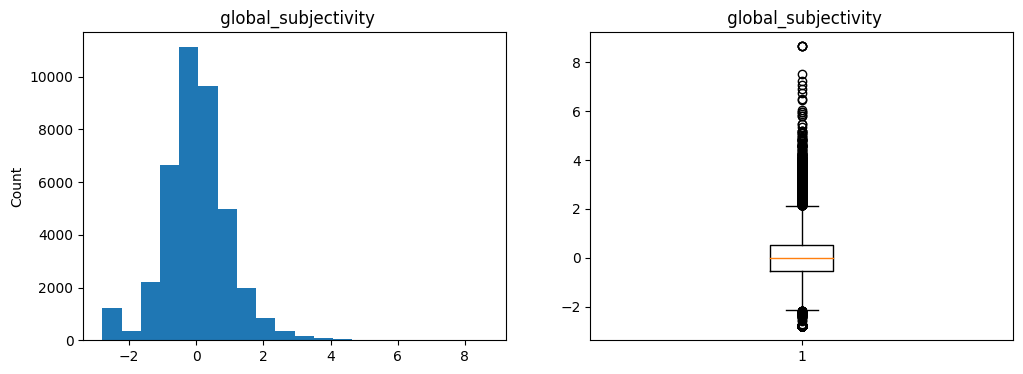

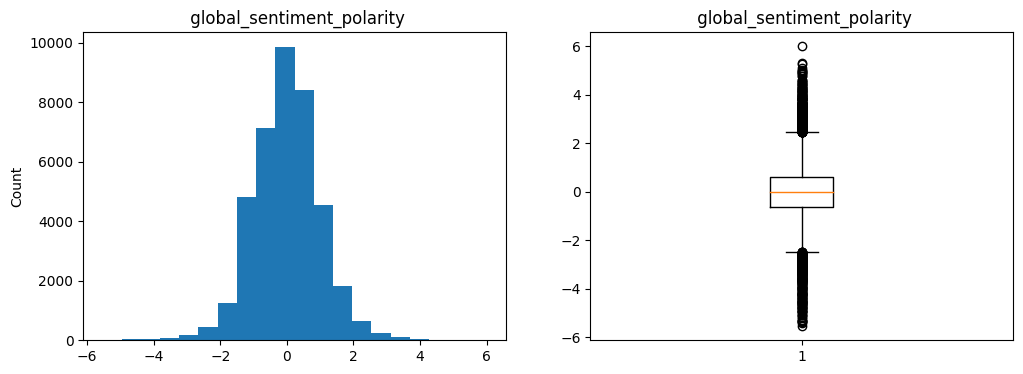

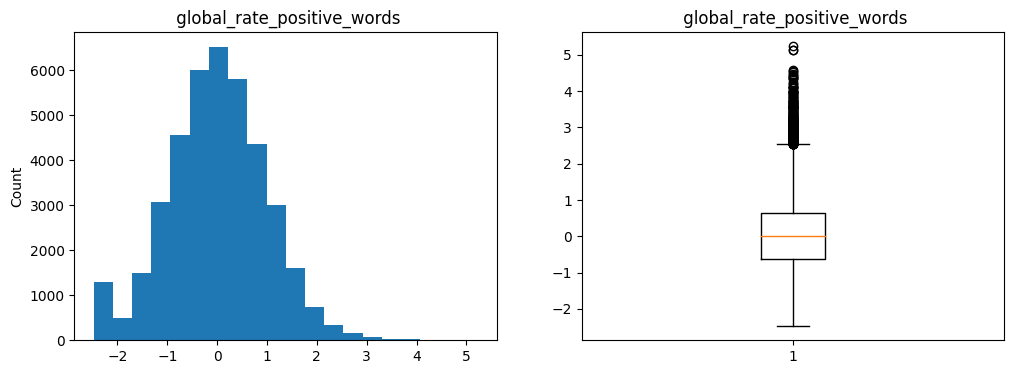

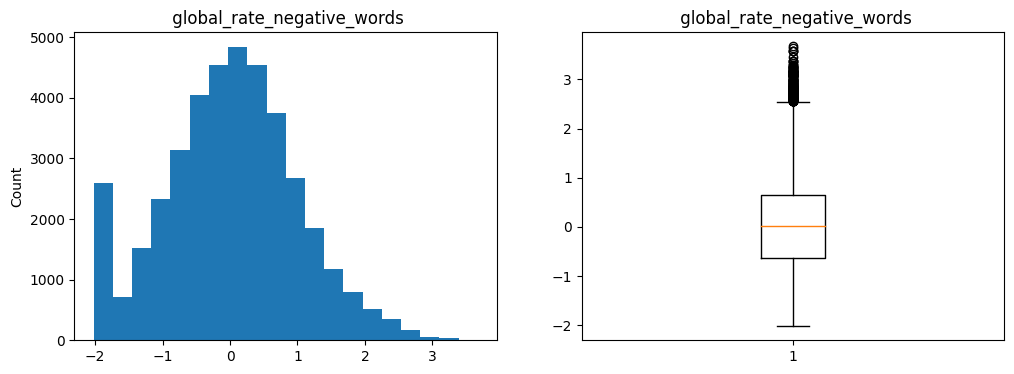

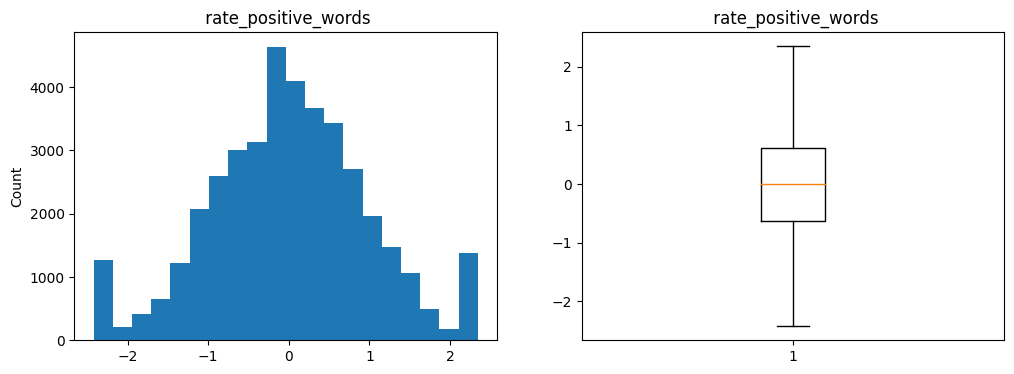

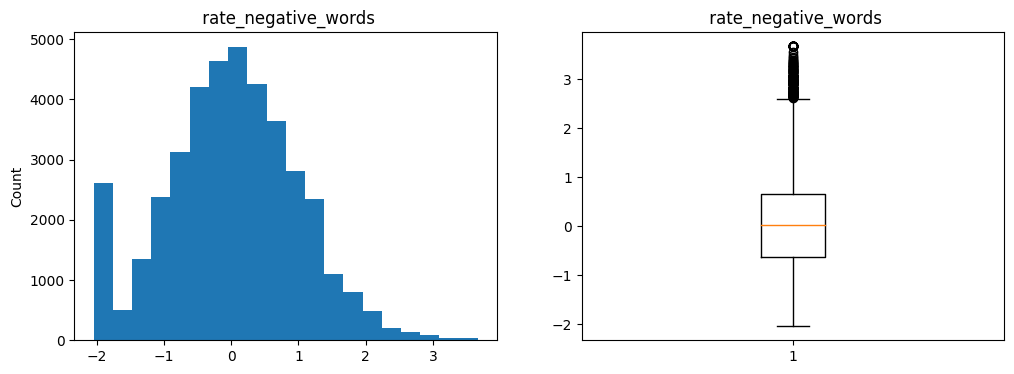

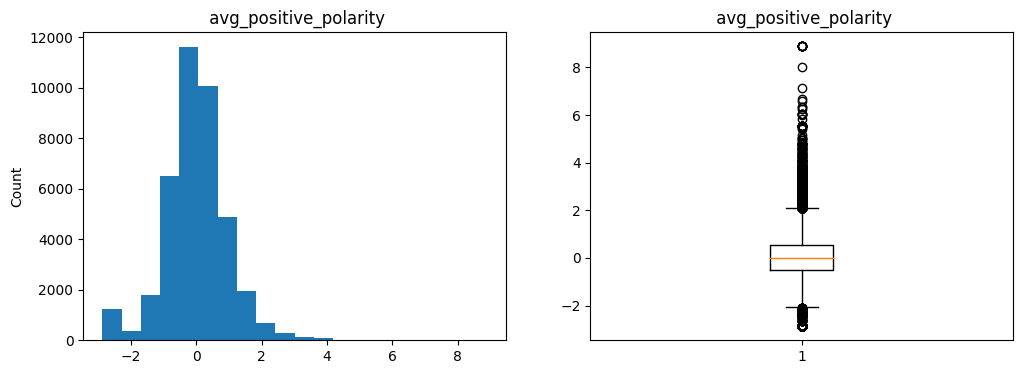

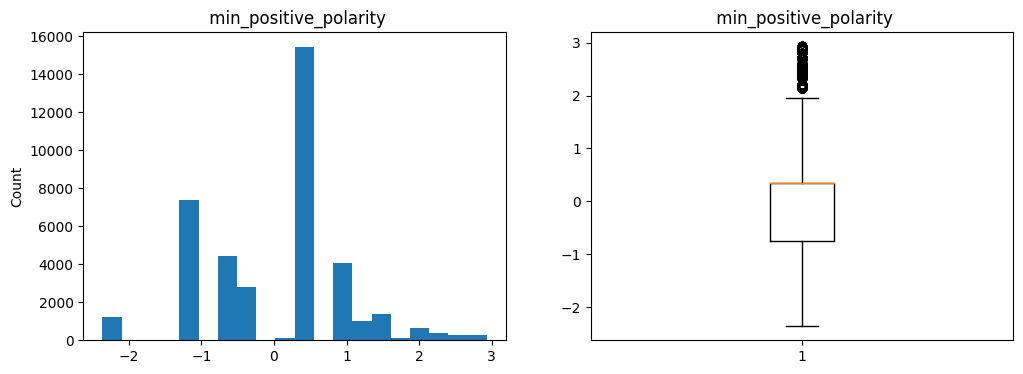

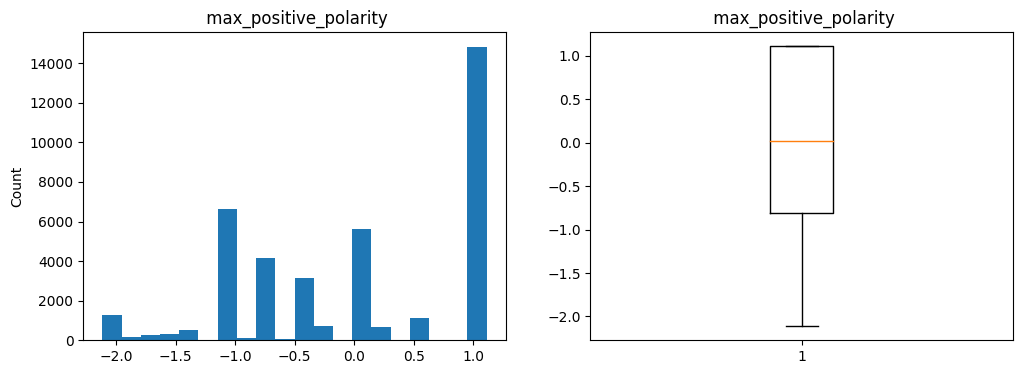

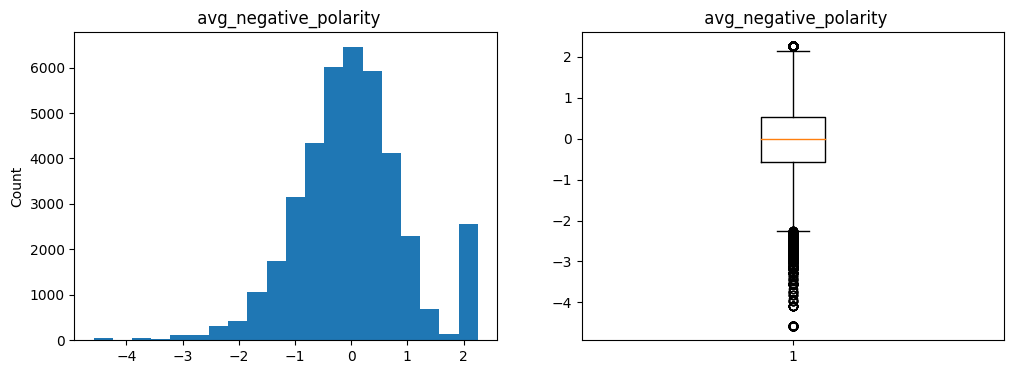

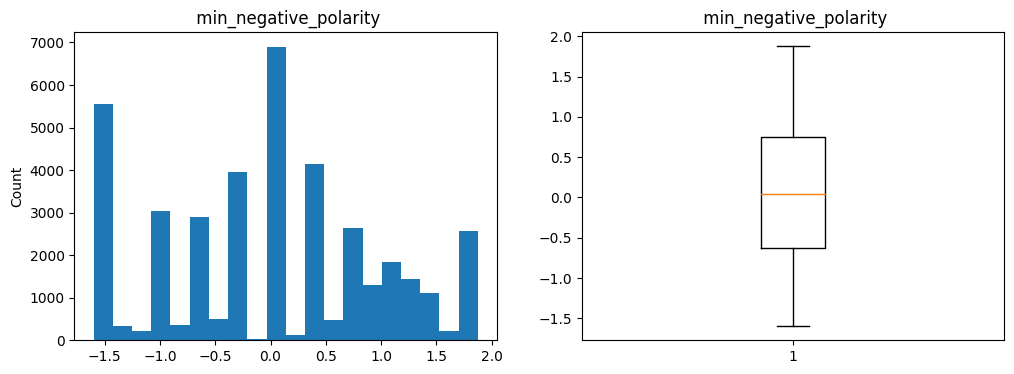

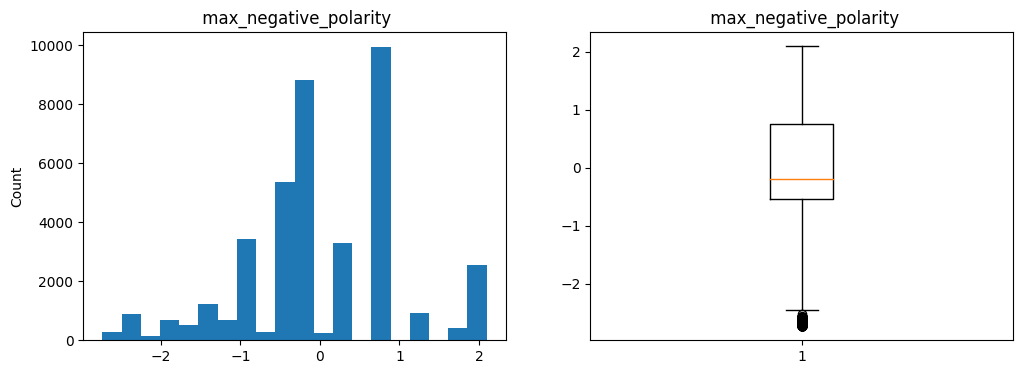

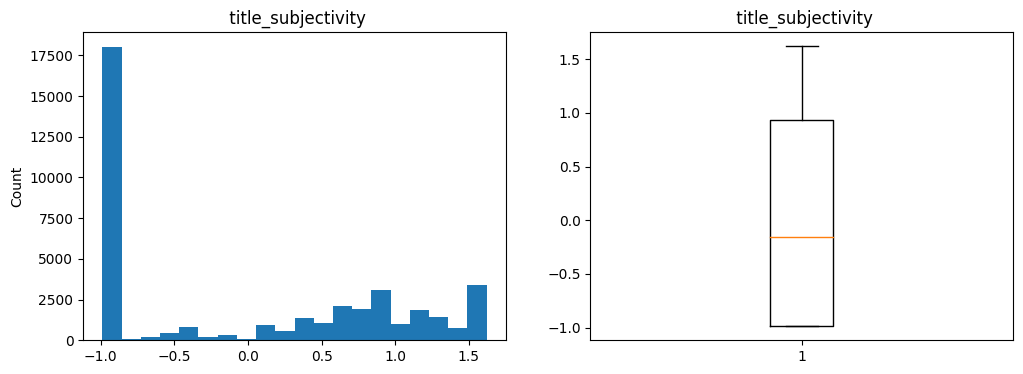

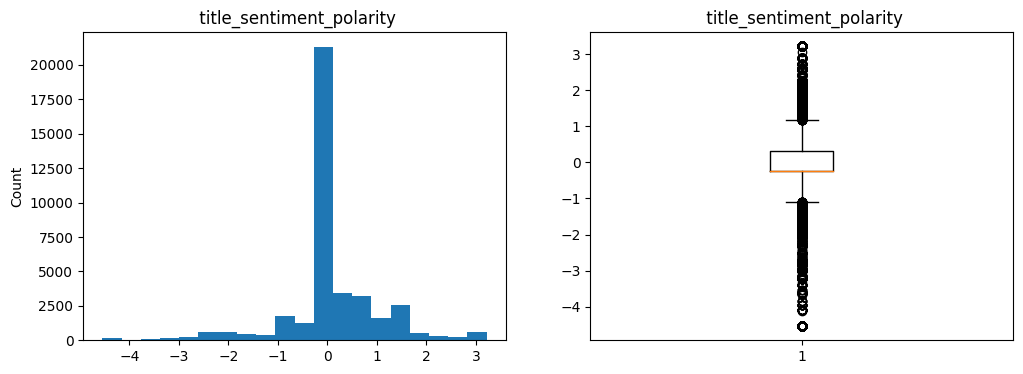

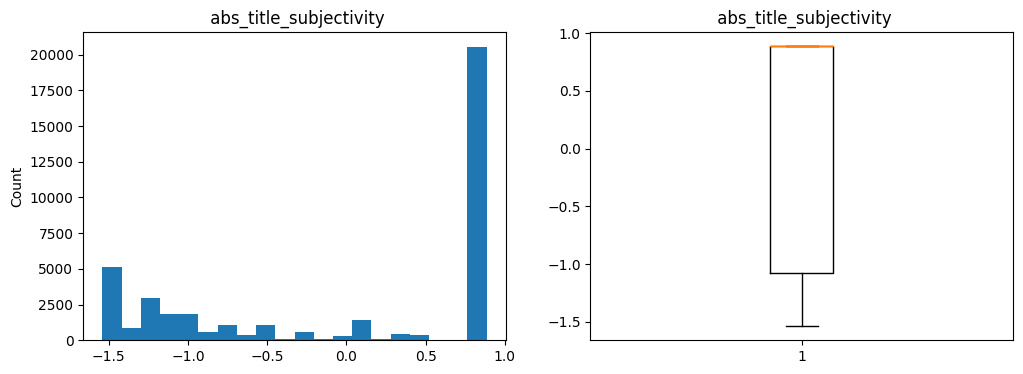

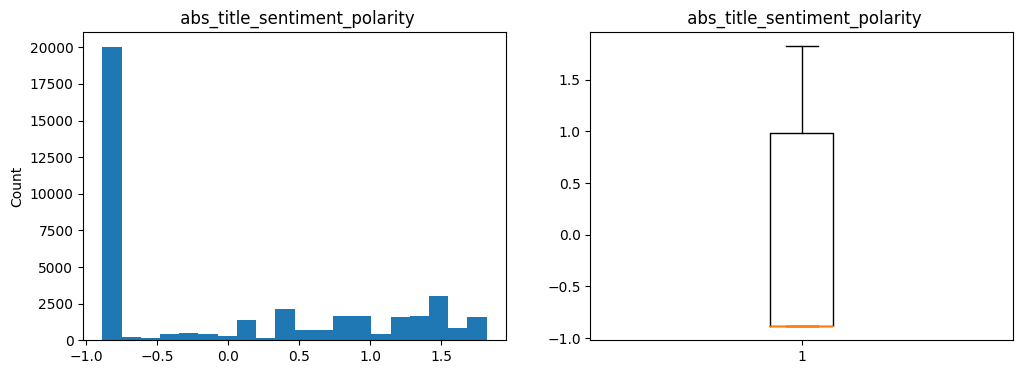

In [33]:
# plotting histogram and boxplot side by side
#plotting the normalized numeric variables including shares which is response variable 
for i in range(0,39):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=standardized_data.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(standardized_data.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(standardized_data.columns[i])
    plt.show()

It can seen that after normalization, variables which were right or left skewed are showing normal distribution including response variable which was right skewed. 

In [34]:
# Creating dummy variables from categorical columns:
newdf = pd.get_dummies(data, columns=[' data_channel_is_lifestyle',  ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',' data_channel_is_world', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend'])
newdf.head() #first dataframe for modeling 

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,weekday_is_thursday_0.0,weekday_is_thursday_1.0,weekday_is_friday_0.0,weekday_is_friday_1.0,weekday_is_saturday_0.0,weekday_is_saturday_1.0,weekday_is_sunday_0.0,weekday_is_sunday_1.0,is_weekend_0.0,is_weekend_1.0
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,1,0,1,0,1,0,1,0,1,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,1,0,1,0,1,0,1,0,1,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1,0,1,0,1,0,1,0,1,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,1,0,1,0,1,0,1,0,1,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1,0,1,0,1,0,1,0,1,0


### need to drop numeric columns from these  and append standarized data to this new_df which has dummy variables for the categorical data

In [35]:
df1 = newdf.drop(columns=['url', ' n_tokens_title',' n_tokens_content',' n_unique_tokens',' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',' num_self_hrefs',
 ' num_imgs',' num_videos',' average_token_length', ' num_keywords',' kw_min_min', ' kw_max_min',
 ' kw_avg_min',' kw_min_max',' kw_max_max', ' kw_avg_max',' kw_min_avg',' kw_max_avg',' kw_avg_avg', ' self_reference_min_shares',
 ' self_reference_max_shares',' self_reference_avg_sharess',' global_subjectivity',' global_sentiment_polarity',
 ' global_rate_positive_words',' global_rate_negative_words',' rate_positive_words',' rate_negative_words',
 ' avg_positive_polarity',' min_positive_polarity',' max_positive_polarity',' avg_negative_polarity',
 ' min_negative_polarity',' max_negative_polarity', ' title_subjectivity',' title_sentiment_polarity',' abs_title_subjectivity',
 ' abs_title_sentiment_polarity'])

In [36]:
df1 #sanity check 

,timedelta,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,shares,share_level,data_channel_is_lifestyle_0.0,data_channel_is_lifestyle_1.0,...,weekday_is_thursday_0.0,weekday_is_thursday_1.0,weekday_is_friday_0.0,weekday_is_friday_1.0,weekday_is_saturday_0.0,weekday_is_saturday_1.0,weekday_is_sunday_0.0,weekday_is_sunday_1.0,is_weekend_0.0,is_weekend_1.0
0,731.0,0.500331,0.378279,0.040005,0.041263,0.040123,593,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,731.0,0.799756,0.050047,0.050096,0.050101,0.050001,711,1,1,0,...,1,0,1,0,1,0,1,0,1,0
2,731.0,0.217792,0.033334,0.033351,0.033334,0.682188,1500,1,1,0,...,1,0,1,0,1,0,1,0,1,0
3,731.0,0.028573,0.419300,0.494651,0.028905,0.028572,1200,1,1,0,...,1,0,1,0,1,0,1,0,1,0
4,731.0,0.028633,0.028794,0.028575,0.028572,0.885427,505,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8.0,0.025038,0.025001,0.151701,0.025000,0.773260,1800,1,1,0,...,1,0,1,0,1,0,1,0,1,0
39640,8.0,0.029349,0.028575,0.231866,0.681635,0.028575,1900,1,1,0,...,1,0,1,0,1,0,1,0,1,0
39641,8.0,0.159004,0.025025,0.025207,0.643794,0.146970,1900,1,1,0,...,1,0,1,0,1,0,1,0,1,0
39642,8.0,0.040004,0.040003,0.839987,0.040002,0.040004,1100,1,1,0,...,1,0,1,0,1,0,1,0,1,0


Now joining all the categorical attributes to the standardized_data for further analysis and modleing 

In [37]:
complete_data = standardized_data.join(df1) #using join fuction


In [38]:
complete_data = complete_data.join(data[data_channel1])


In [39]:
complete_data #sanity check

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,weekday_is_sunday_0.0,weekday_is_sunday_1.0,is_weekend_0.0,is_weekend_1.0,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0.768359,-0.720956,0.861365,0.165674,0.781136,-0.693423,-0.149019,-0.290008,-0.749604,0.022536,...,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.644399,-0.582079,0.511983,0.165674,0.664751,-0.957425,-0.740154,-0.290008,-0.749604,0.677491,...,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.644399,-0.753699,0.330606,0.165674,-0.000646,-0.957425,-0.740154,-0.290008,-0.749604,-0.669620,...,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.644399,0.213271,-0.122812,0.165674,0.008904,0.153481,-1.767673,-0.290008,-0.749604,-0.644056,...,1,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.216605,1.214913,-0.718135,0.165674,-0.691796,1.042550,2.522405,1.660464,-0.749604,0.029020,...,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.309590,-0.277999,0.040511,0.165674,0.111594,0.153481,1.251290,-0.290008,1.062406,-0.371357,...,1,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
39640,0.768359,-0.333828,1.049465,0.165674,1.118071,0.153481,1.251290,0.558841,1.944837,-0.642740,...,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
39641,-0.160861,-0.007013,-0.041182,0.165674,-0.107914,1.338081,-0.740154,1.436243,1.062406,1.189318,...,1,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0
39642,-2.193336,0.539768,0.107113,0.165674,0.153491,0.273184,-0.740154,-0.290008,-0.749604,0.864498,...,1,0,1,0,0.0,0.0,0.0,0.0,0.0,1.0


Now this is now complete data after analysis and cleaning which can used for further work 

### Feature Selection / Dimensionality Reduction 

In [40]:
# importing required libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

In [41]:
X = complete_data.drop(['share_level'],axis=1)
y = complete_data['share_level']

# splitting the data into training + testing subsets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)


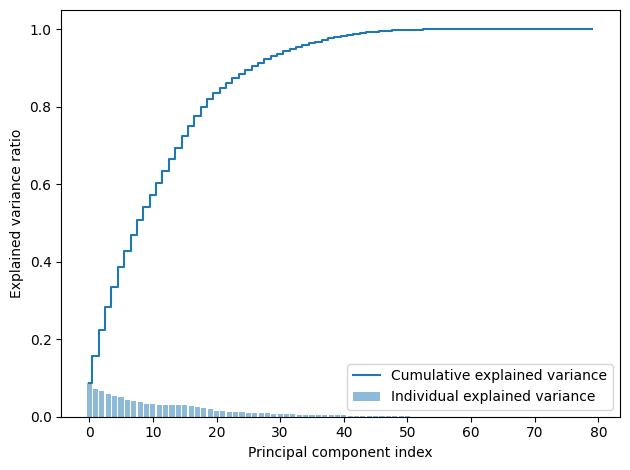

In [42]:
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [43]:
# calculating how many attributes required to explain 95% of total variance 
attributes = 0
threshold = 0.95 #variance
for i in range(len(pca.explained_variance_ratio_)):
    attributes += pca.explained_variance_ratio_[i]
    if attributes > threshold:
        print(str(i) + ' attributes required to explain 95% of total variance.')
        break

33 attributes required to explain 95% of total variance.


In [44]:
pca2 = PCA(33)
reduced_data = pca2.fit_transform(X) #new array with only 33 attributes 
reduced_data.shape 

(39644, 33)

Hence we have only 33 attributes instead of 80 which are required for model. 

### Data Modeling 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics

In [46]:
X = reduced_data
Y = complete_data['share_level']

In [47]:
from sklearn import preprocessing

In [48]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [49]:
X_scale

array([[7.02068152e-04, 9.99915122e-01, 2.45988622e-01, ...,
        4.48828760e-01, 2.37583004e-01, 2.86830338e-01],
       [8.41994740e-04, 9.99891818e-01, 1.91454664e-01, ...,
        5.05402307e-01, 2.16815306e-01, 3.21715255e-01],
       [1.77760600e-03, 9.99724725e-01, 2.65772636e-01, ...,
        5.05911014e-01, 2.80103552e-01, 3.43747996e-01],
       ...,
       [2.25179699e-03, 6.69820621e-03, 2.84210495e-01, ...,
        2.43243680e-01, 2.22333918e-01, 3.28056963e-01],
       [1.30314166e-03, 6.87246032e-03, 2.31224949e-01, ...,
        2.73191532e-01, 2.14382618e-01, 4.28157892e-01],
       [1.54030554e-03, 6.83234018e-03, 2.55121436e-01, ...,
        1.65586790e-01, 1.65965782e-01, 5.10105394e-01]])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [52]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [53]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(27750, 33) (5947, 33) (5947, 33) (27750,) (5947,) (5947,)


In [54]:
 from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [56]:
#Fit the StandardScaler to the training data
X_train = scaler.fit_transform(X_train)

# Apply the StandardScaler, but not fit, to the validation data
X_val = scaler.transform(X_val)

In [57]:
from keras.models import Sequential
from keras.layers import Dense

# Model 1 

In [58]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(33,)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax'),
])

In [59]:
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])

In [60]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val))

Epoch 1/100
868/868 [==============================] - 3s 2ms/step - loss: 1.1879 - accuracy: 0.3116 - val_loss: 1.1786 - val_accuracy: 0.3018
Epoch 2/100
868/868 [==============================] - 2s 2ms/step - loss: 1.1844 - accuracy: 0.3146 - val_loss: 1.1766 - val_accuracy: 0.3070
Epoch 3/100
868/868 [==============================] - 2s 2ms/step - loss: 1.1830 - accuracy: 0.3151 - val_loss: 1.1755 - val_accuracy: 0.3112
Epoch 4/100
868/868 [==============================] - 2s 3ms/step - loss: 1.1821 - accuracy: 0.3150 - val_loss: 1.1749 - val_accuracy: 0.3082
Epoch 5/100
868/868 [==============================] - 2s 3ms/step - loss: 1.1815 - accuracy: 0.3162 - val_loss: 1.1744 - val_accuracy: 0.3089
Epoch 6/100
868/868 [==============================] - 2s 2ms/step - loss: 1.1811 - accuracy: 0.3185 - val_loss: 1.1740 - val_accuracy: 0.3064
Epoch 7/100
868/868 [==============================] - 2s 2ms/step - loss: 1.1808 - accuracy: 0.3181 - val_loss: 1.1738 - val_accuracy: 0.3072

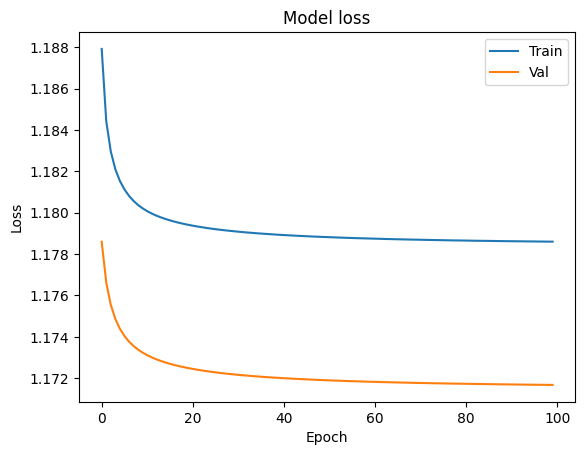

In [61]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

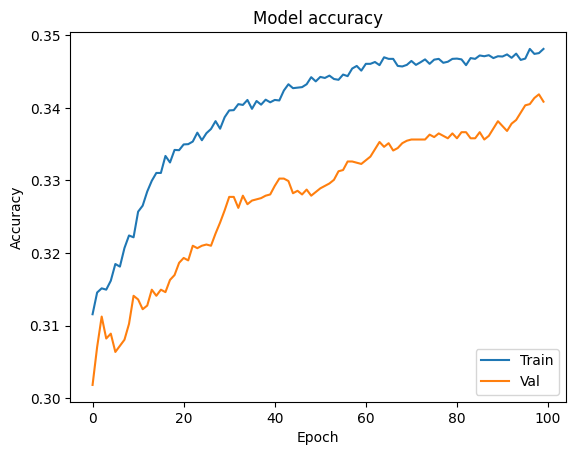

In [62]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [65]:
model.evaluate(X_test, Y_test)[1] 

186/186 [==============================] - 0s 2ms/step - loss: 1.1621 - accuracy: 0.5648


0.5648226141929626

# Model 2 

In [71]:
model_2 = Sequential([
    Dense(100, activation='relu', input_shape=(33,)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(3, activation='softmax'),
])

model_2.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])


In [73]:
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
868/868 [==============================] - 3s 3ms/step - loss: 1.1785 - accuracy: 0.3263 - val_loss: 1.1715 - val_accuracy: 0.1019
Epoch 2/100
868/868 [==============================] - 4s 4ms/step - loss: 1.1785 - accuracy: 0.3343 - val_loss: 1.1715 - val_accuracy: 0.3257
Epoch 3/100
868/868 [==============================] - 3s 3ms/step - loss: 1.1785 - accuracy: 0.3314 - val_loss: 1.1715 - val_accuracy: 0.1016
Epoch 4/100
868/868 [==============================] - 3s 3ms/step - loss: 1.1785 - accuracy: 0.3409 - val_loss: 1.1715 - val_accuracy: 0.3259
Epoch 5/100
868/868 [==============================] - 3s 3ms/step - loss: 1.1785 - accuracy: 0.3391 - val_loss: 1.1715 - val_accuracy: 0.5712
Epoch 6/100
868/868 [==============================] - 3s 3ms/step - loss: 1.1785 - accuracy: 0.3454 - val_loss: 1.1715 - val_accuracy: 0.5729
Epoch 7/100
868/868 [==============================] - 3s 4ms/step - loss: 1.1785 - accuracy: 0.3519 - val_loss: 1.1715 - val_accuracy: 0.3271

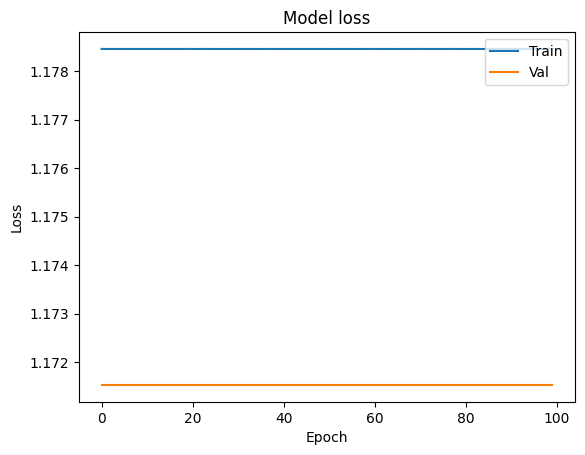

In [74]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

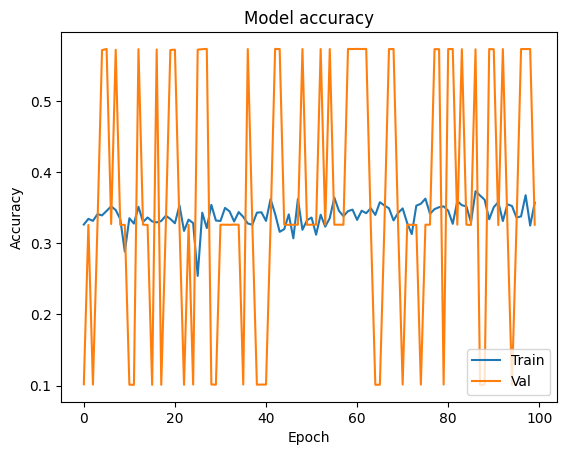

In [75]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [76]:
model_2.evaluate(X_test, Y_test)[1]

186/186 [==============================] - 0s 2ms/step - loss: 1.1621 - accuracy: 0.3222


0.32217925786972046

# Model 3

In [77]:
from keras.layers import Dropout
from keras import regularizers

In [78]:
model_3 = Sequential([
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(33,)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)),
])

In [79]:
model_3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
868/868 [==============================] - 5s 4ms/step - loss: 1.3964 - accuracy: 0.3842 - val_loss: 1.1715 - val_accuracy: 0.1011
Epoch 2/100
868/868 [==============================] - 3s 4ms/step - loss: 1.1785 - accuracy: 0.1984 - val_loss: 1.1715 - val_accuracy: 0.1011
Epoch 3/100
868/868 [==============================] - 3s 4ms/step - loss: 1.1785 - accuracy: 0.2028 - val_loss: 1.1715 - val_accuracy: 0.1011
Epoch 4/100
868/868 [==============================] - 4s 5ms/step - loss: 1.1785 - accuracy: 0.2014 - val_loss: 1.1715 - val_accuracy: 0.3260
Epoch 5/100
868/868 [==============================] - 3s 4ms/step - loss: 1.1785 - accuracy: 0.1965 - val_loss: 1.1715 - val_accuracy: 0.1011
Epoch 6/100
868/868 [==============================] - 3s 4ms/step - loss: 1.1785 - accuracy: 0.1920 - val_loss: 1.1715 - val_accuracy: 0.1011
Epoch 7/100
868/868 [==============================] - 3s 4ms/step - loss: 1.1785 - accuracy: 0.2057 - val_loss: 1.1715 - val_accuracy: 0.5729

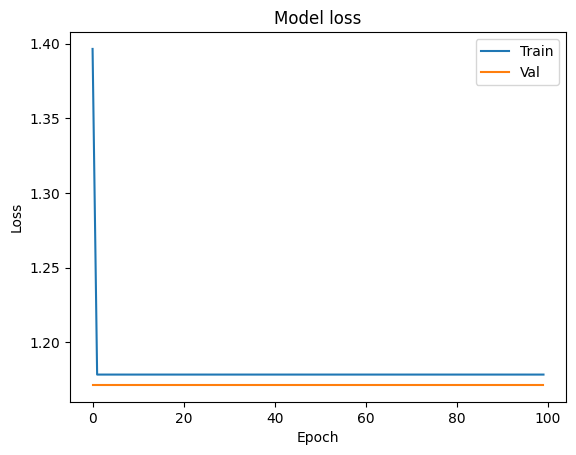

In [80]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

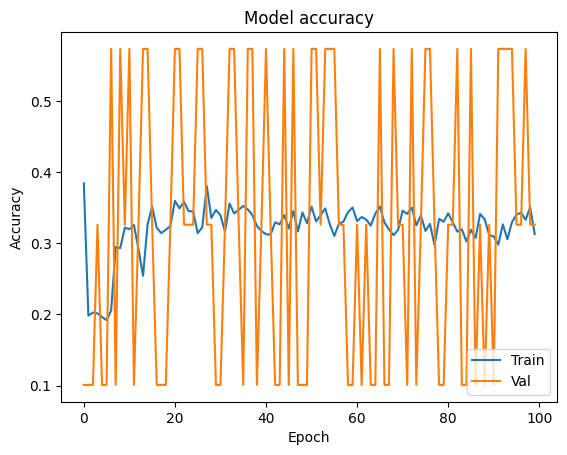

In [81]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [82]:
model_3.evaluate(X_test, Y_test)[1]

186/186 [==============================] - 1s 3ms/step - loss: 1.1621 - accuracy: 0.3222


0.32217925786972046

### Conclusion:

Successfully completed the steps mentioned in the introduction. Imported the data then did EDA work. Followed by normalization of data then reduced the number of attributes or column from 80 to 33 using Principle component analysis (PCA), then trained and evaluated 3 different neural network models.

### References: 

1. https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
2. Prof. Topor's notebook
3. https://www.geeksforgeeks.org/principal-component-analysis-with-python/
4. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
5. https://www.python-graph-gallery.com/heatmap/
6. https://www.freecodecamp.org/news how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/
7. https://vitalflux.com/pca-explained-variance-concept-python-example/
8. https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb
